<a href="https://colab.research.google.com/github/LGustavoAN/EDA-CSGO/blob/main/Atividade4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do Problema
A base de dados trata sobre a previsão de ganhador em um round de CSGO que pode se dividir entre CT(Contra-Terrorista) e T(Terrorista). Para construção do dataset foi feito um "print" do estado do round a cada 20s da partida até a finalização do round. Por mais que o dataset possua um questão temporal entre seus dados foi pedido para que cada instancia seja considerada única. A base de dados foi extraida de 700 demos de partidas de torneios de alto nível em 2019 e 2020. 

O número total de instâncias é 122411 com 97 parâmetros.

Os príncipais parâmetros são:


*   **time_left:** tempo até acabar o round considerando tempo máximo de 175s
*   **ct_score:** número de rounds vencidos anteriormente, variando de 0 a 15
*   **t_score:** número de rounds vencidos anteriormente, variando de 0 a 15
*   **map:** mapa da partida podendo variar em 8 valores
*   **bomb_planted:** se a bomba ta planta no instante do "print", verdadeiro ou falso
*   **ct_health:** somatoria da vida de todos do time CT
*   **t_health:** somatoria da vida de todos do time T
*   **ct_armor:** somatoria do colete de todos do time CT
*   **t_armor:** somatoria do colete de todos do time T
*   **ct_money:** somatoria do dinheiro de todos do time CT
*   **t_money:** somatoria do dinheiro de todos do time T
*   **ct_helmets:** quantidade de CT com capacete
*   **t_helmets:** quantidade de T com capacete
*   **ct_defuse_kits:** quantidade de CT com defuse kit
*   **ct_players_alive:** quantidade de CT vivos
*   **t_players_alive:** quantidade de T vivos

Depois disso há uma sequencia de de features descrevendo a quantidade de integrantes com cada tipo de arma, devido a quantidade de armas não irei colocar uma por uma mas o valor varia entre 0 e 5. E por último temos round_winner que indica se o vencedor foi CT ou T.

*Descrição do Jogo:* 

Counter-Strike: Global Offensive (CS:GO) é um jogo online desenvolvido pela Valve Corporation e pela Hidden Path Entertainment, sendo uma sequência de Counter-Strike: Source. É o quarto título principal da franquia. O jogo é famoso pelo seu cenário competitivo com premições 2 milhões de dólares nos principais eventos.

Históricamente o Brasil tem um boa relação com game que em sua versão CS 1.6 foi muito jogado no período da lan house e criou um cenário competitivo inicial no brasil e no mundo, mas foi na versão CS GO que o jogo ganhou novos áreas atingindo um maior público e aumentando suas premiações. Nessa no fase do jogo o Brasil teve seu destaque com 2 times que ganharam alguns Major SK Gaming e Luminosity Gaming ambos times compostos 100% por jogadores brasileiros mas de organizações estrageiras. 


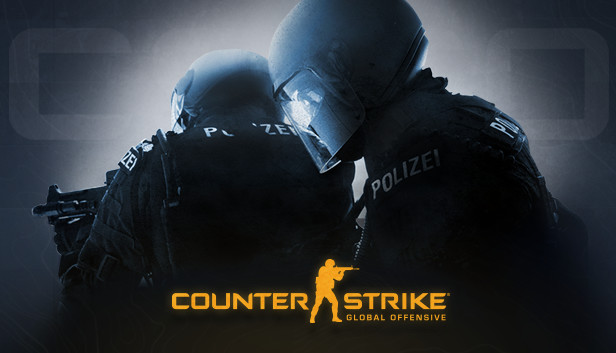

# Análise dos relacionamentos das variáveis

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from random import random
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Krunkerzeiros.IO/Análise/Atividade4/csgo_round_snapshots.csv')
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [ ]:
#Exibindo a dimensão da base da dados
print("Dimensão da base de dados:")
print("Linhas (instâncias: {})".format(df.shape[0]))
print("Colunas (Features): {}".format(df.shape[1]))

Dimensão da base de dados:
Linhas (instâncias: 122410)
Colunas (Features): 97


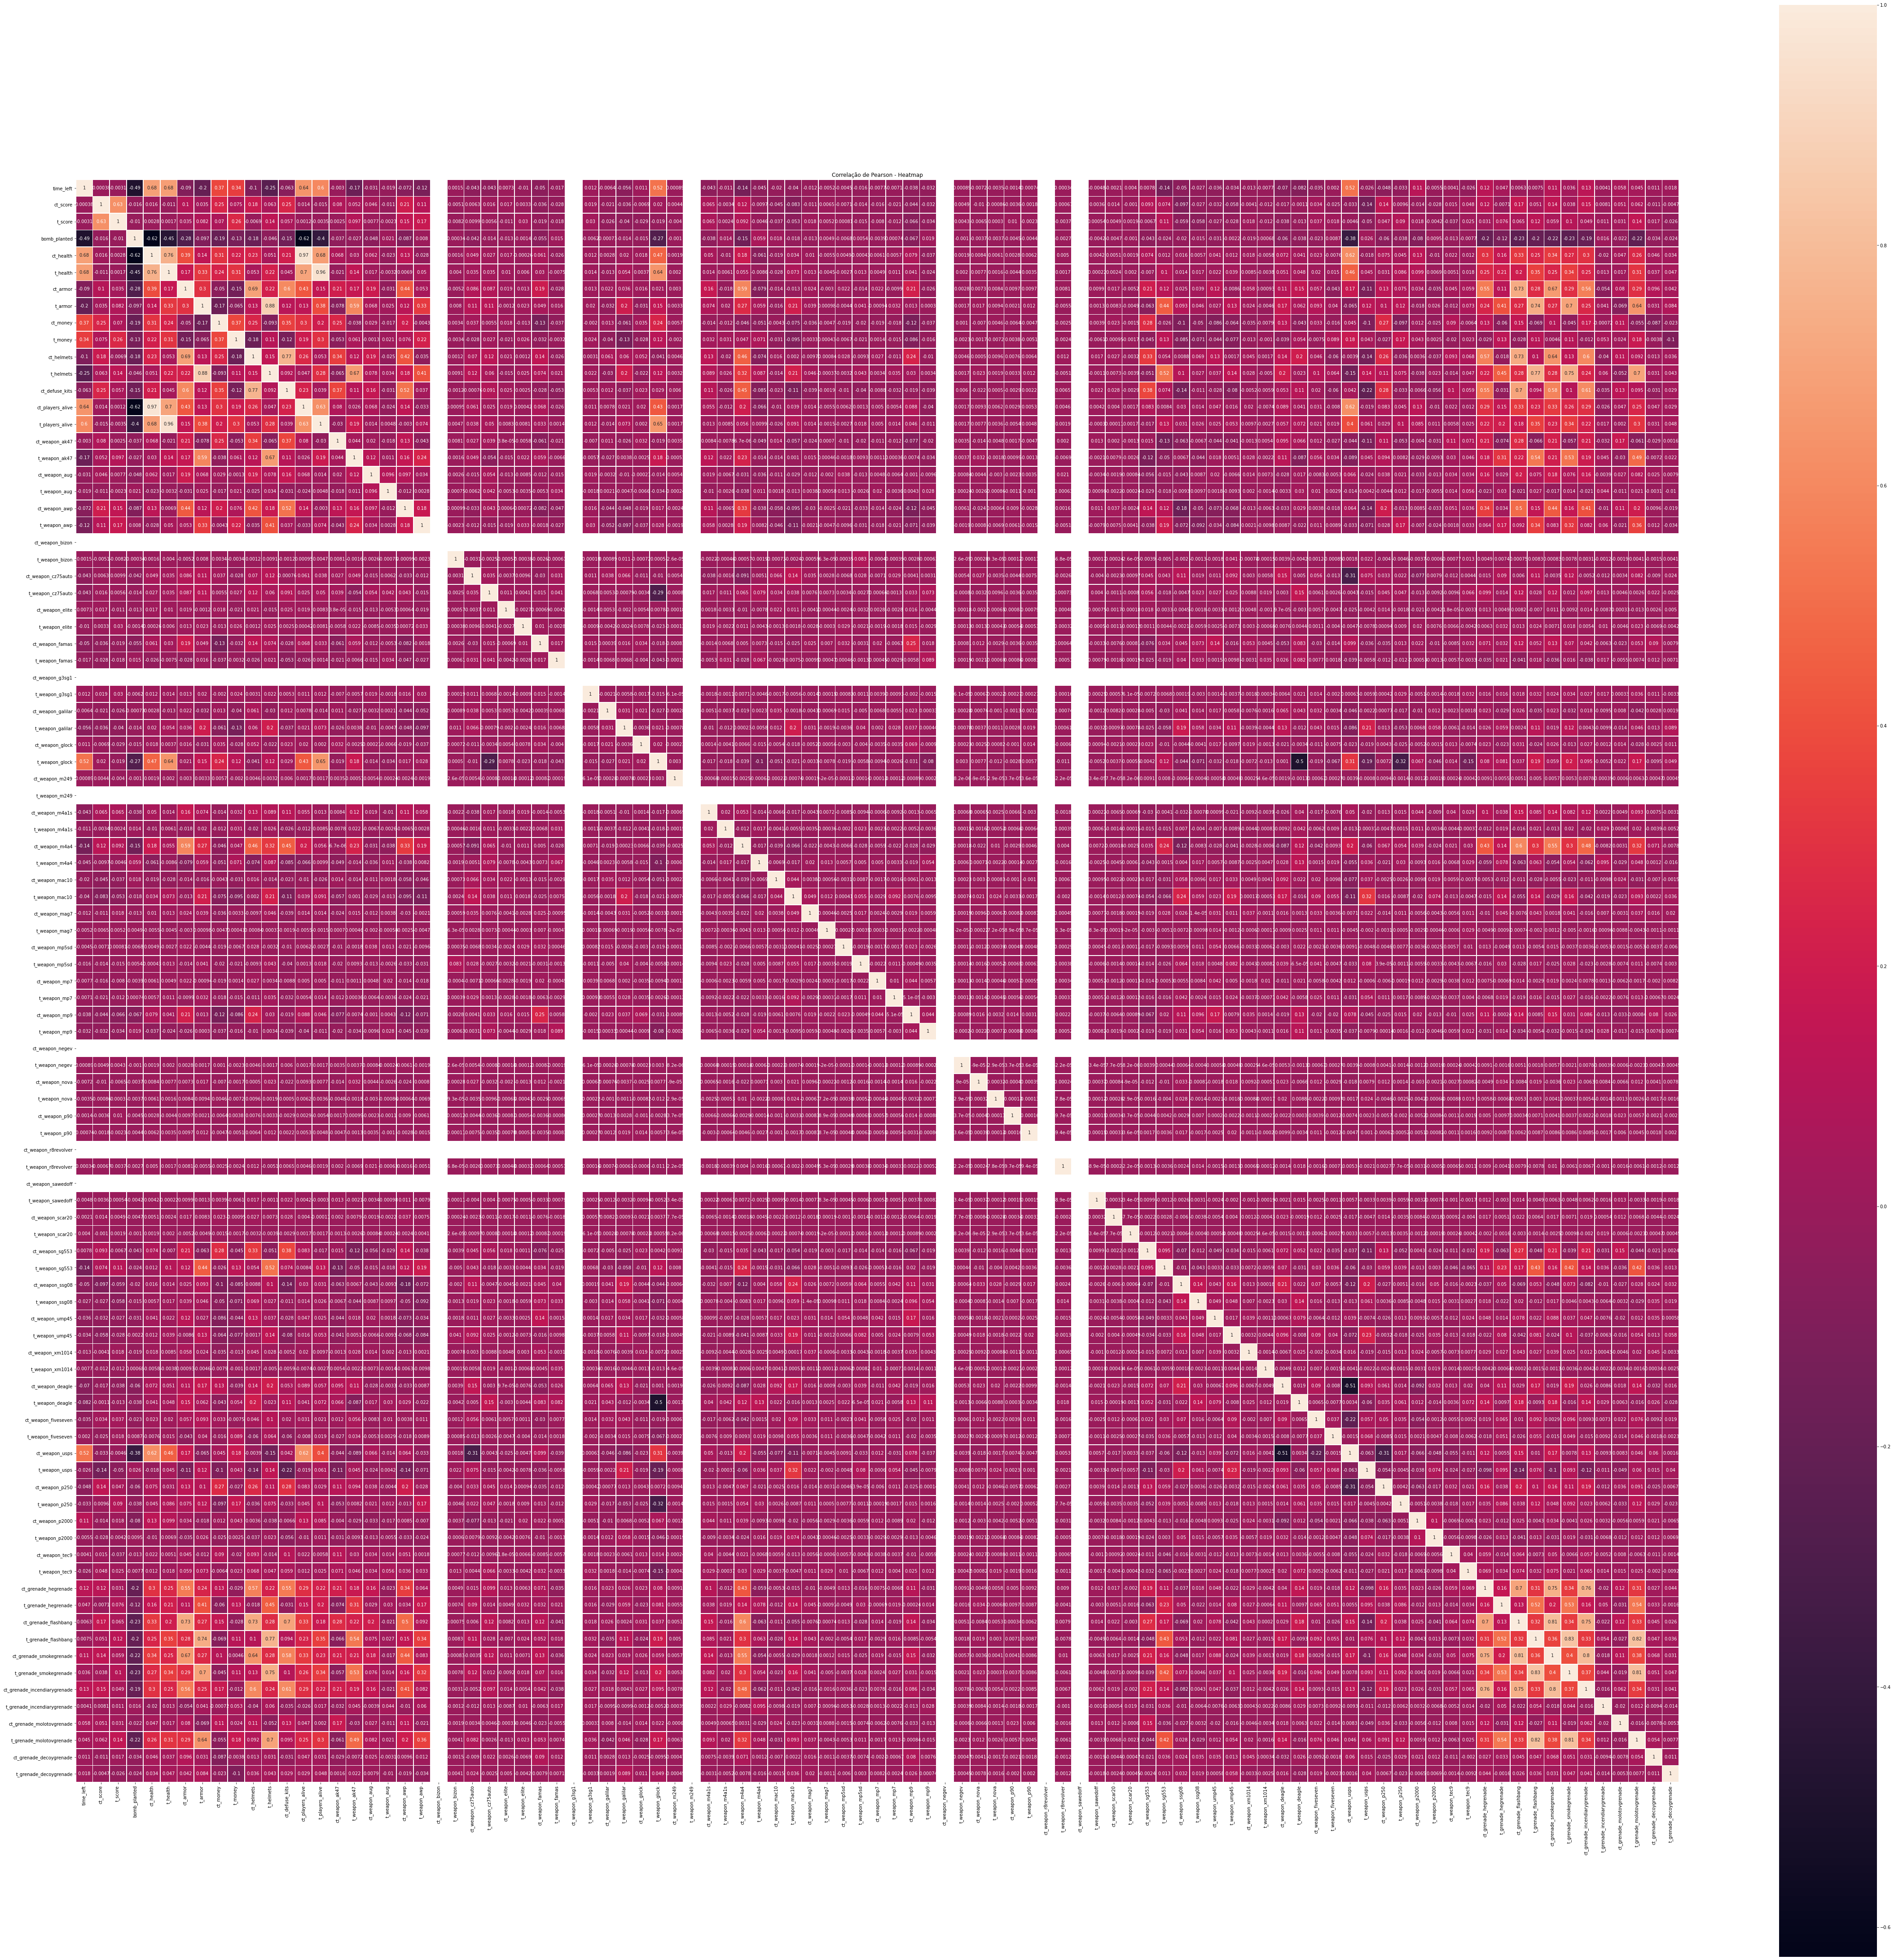

In [ ]:
#Apresentando a correlação através de um mapa de color:
f, ax = plt.subplots(figsize=(80,80))
plt.title('Correlação de Pearson - Heatmap')

sns.heatmap(df.corr(), linewidths=0.7, vmax=1.0, square=True, annot=True) 

## Gráfico de Vitórias por Mapa


In [ ]:
maps = ['de_cache', 'de_dust2', 'de_inferno' ,'de_mirage', 'de_nuke', 'de_overpass', 'de_train', 'de_vertigo']

winners = df.value_counts(['map', 'round_winner'], sort=False)
ct = []
tr = []
for i in range(0,16):
  if i % 2 == 0:
    ct.append(winners[i])
  else:
    tr.append(winners[i])


Nos gráficos abaixos é possível notar duas característica dentro do cenário de jogos: a primeira é que existem mapas que são mais comumente jogados que outros e também que dentro de cada mapa é possível notar que existe um padrão de maior vitórias em relação aos times ct e T. Em relação ao mapa da Cache ele foi retirado do cenário competitivo em março de 2019 o que explica seus valores extremamente baixos em relação a quantidade de partidas.

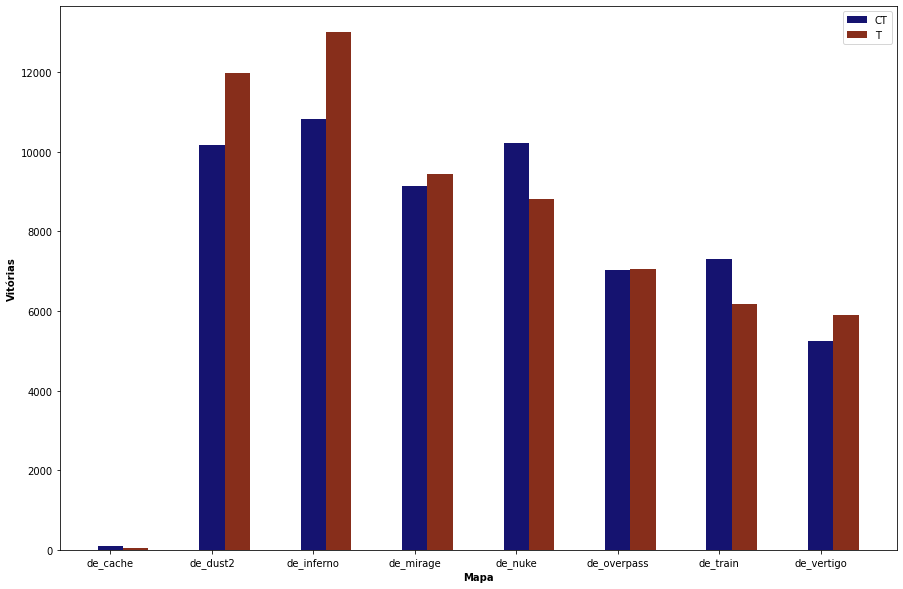

In [ ]:
barWidth = 0.25

r1 = np.arange(len(maps))
r2 = [x + barWidth for x in r1]
y_pos = np.arange(len(maps))
plt.bar(r1, ct, width=barWidth, color='#151370', label='CT')
plt.bar(r2, tr, width=barWidth, color='#872E1B', label='T')
plt.xticks(y_pos, maps)
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Mapa', fontweight='bold')
plt.ylabel('Vitórias', fontweight='bold')
plt.legend()
plt.show()

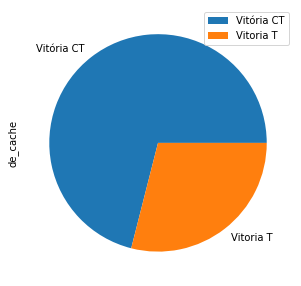

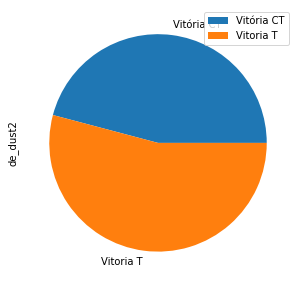

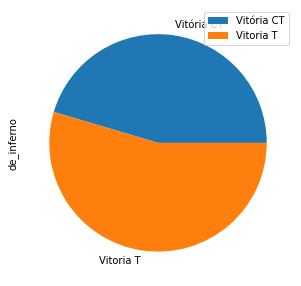

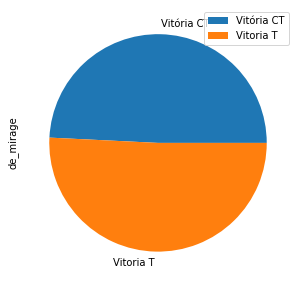

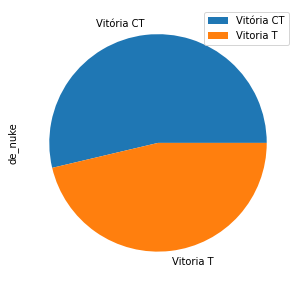

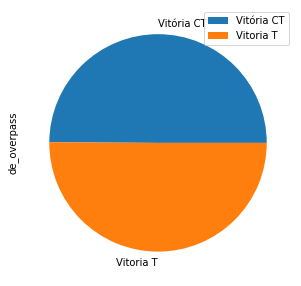

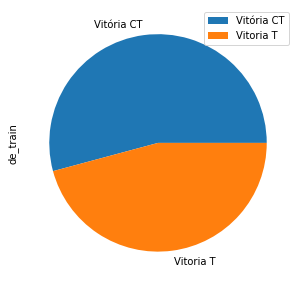

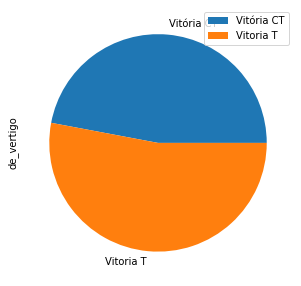

In [ ]:
maps = ['de_cache', 'de_dust2', 'de_inferno' ,'de_mirage', 'de_nuke', 'de_overpass', 'de_train', 'de_vertigo']


for i in range(len(maps)):
  vitoriaMapa = pd.DataFrame({maps[i]: [ct[i], tr[i]]}, index=['Vitória CT', 'Vitoria T'])
  vitoriaMapa.plot(kind='pie', subplots=True, figsize=(10,5))

## Explorando a importância dos defuse kits

In [ ]:
defuse_win = df.value_counts(['ct_defuse_kits', 'round_winner'], sort=False)
print(defuse_win)

n_defuse = ['0','1', '2', '3', '4', '5']
ct_defuse = [12418, 13338, 10173, 10176, 8228, 5671]
t_defuse = [29677, 14062, 7045, 5210, 3785, 2627]

ct_defuse_kits  round_winner
0.0             CT              12418
                T               29677
1.0             CT              13338
                T               14062
2.0             CT              10173
                T                7045
3.0             CT              10176
                T                5210
4.0             CT               8228
                T                3785
5.0             CT               5671
                T                2627
dtype: int64


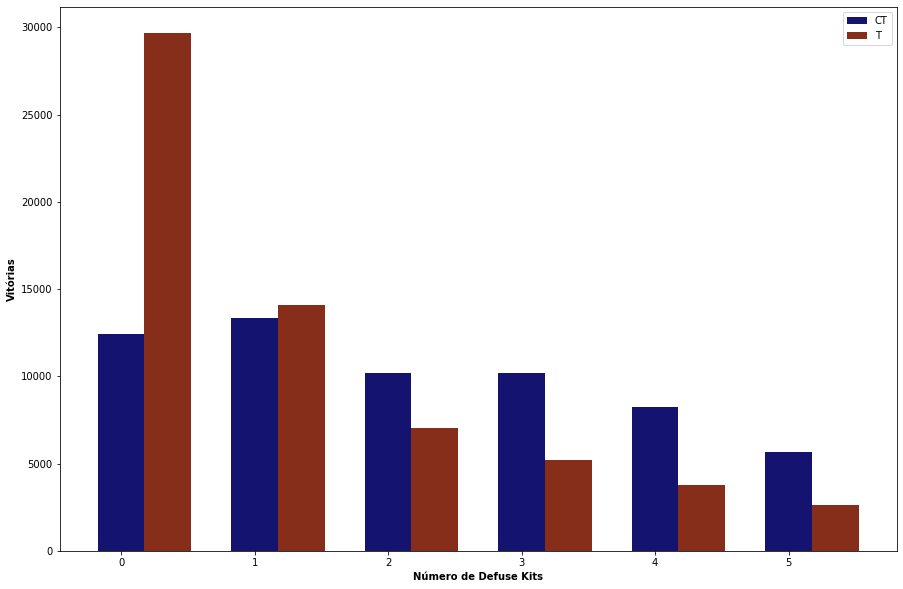

In [ ]:
barWidth = 0.35

r1 = np.arange(len(n_defuse))
r2 = [x + barWidth for x in r1]
y_pos = np.arange(len(n_defuse))
plt.bar(r1, ct_defuse, width=barWidth, color='#151370', label='CT')
plt.bar(r2, t_defuse, width=barWidth, color='#872E1B', label='T')
plt.xticks(y_pos, n_defuse)
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Número de Defuse Kits', fontweight='bold')
plt.ylabel('Vitórias', fontweight='bold')
plt.legend()
plt.show()

Analisando o gráfico é possível perceber a importância dos defuse kits para os contra-terroristas. Quanto maior o número de defuse kits no time maiores as chances dos contra-terroristas ganharem. Porém é importante fazer uma observação. No primeiro caso de 0 defuse kit é possível perceber uma vantagem muito grande dos terroristas. O motivo disso não é necessariamente a ausência de defuse mas sim uma economia ruim dos CT, o que implica em um armamento ruim. Ou seja, muitos dos casos encaixados na classe de 0 defuses os CT perderam pela falta de armamento.

## Grafico de uso das armas e utilitários

  É possível notar que que existe a preferência no uso de algumas armas o que pode indicar que estas armas possuem um maior benefio dentro do jogo.



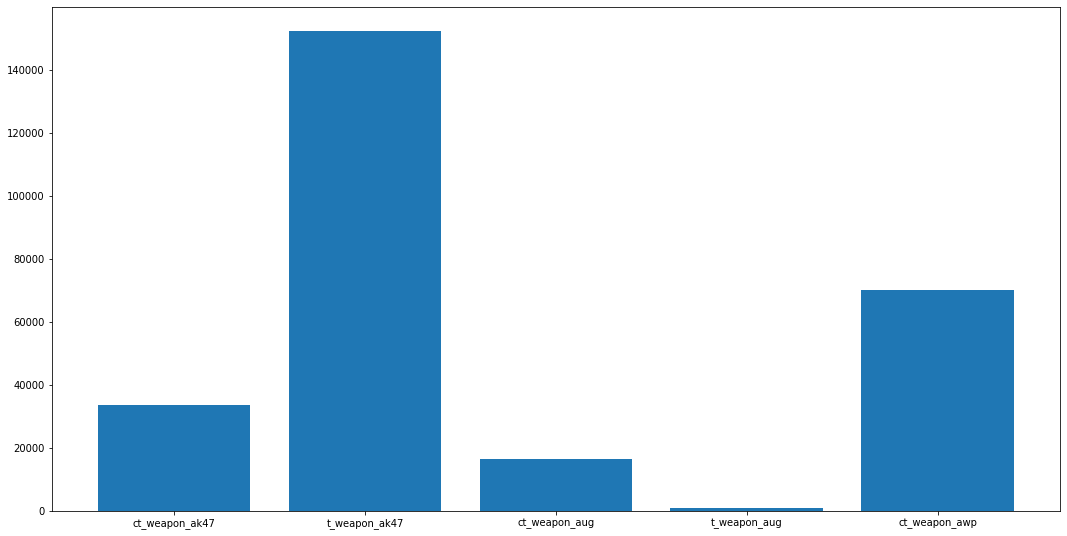

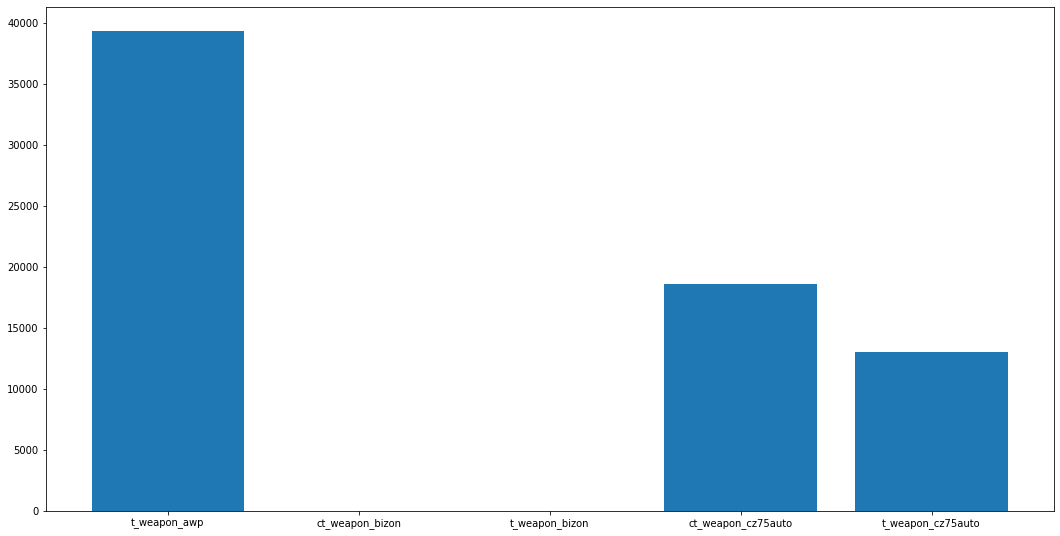

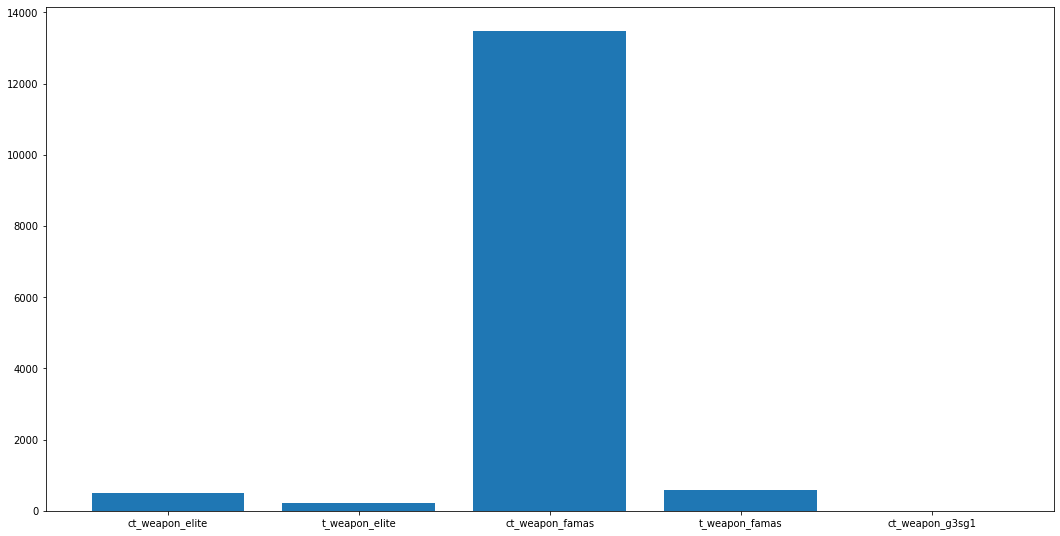

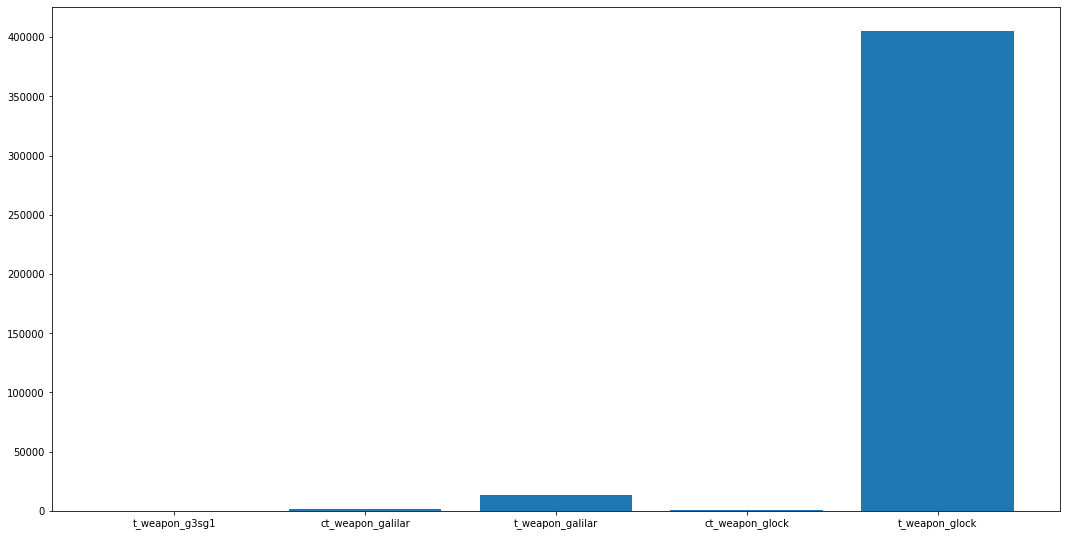

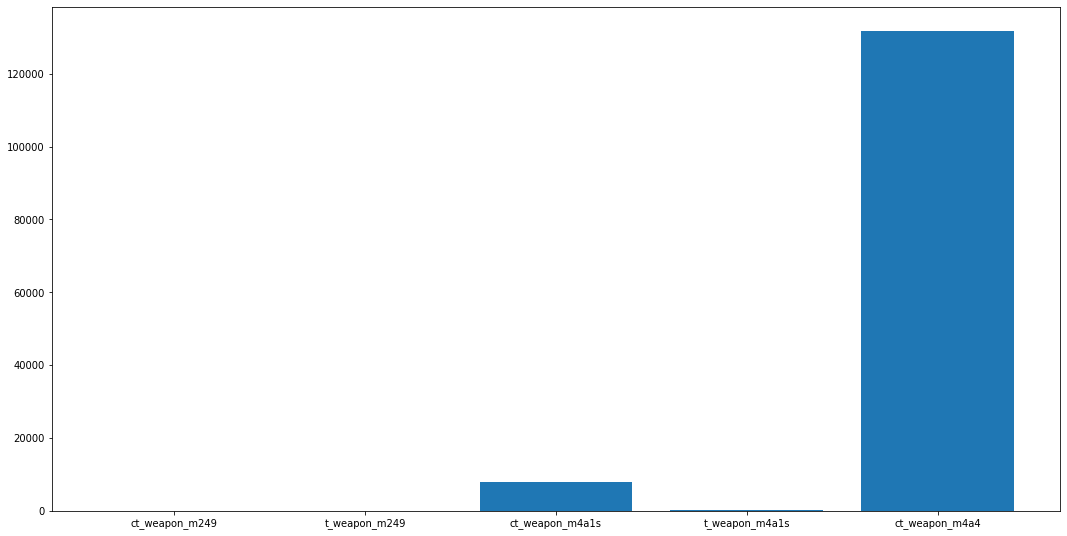

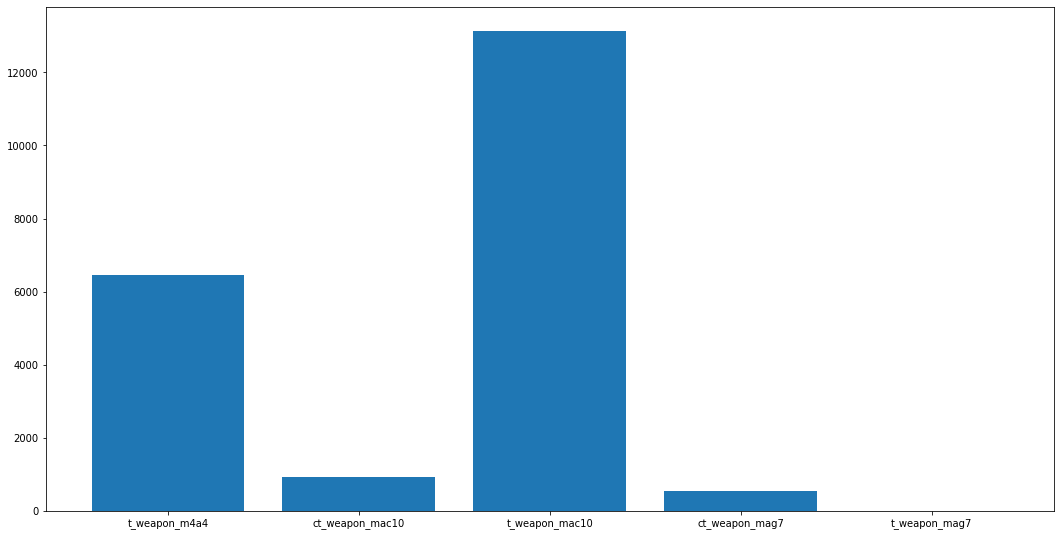

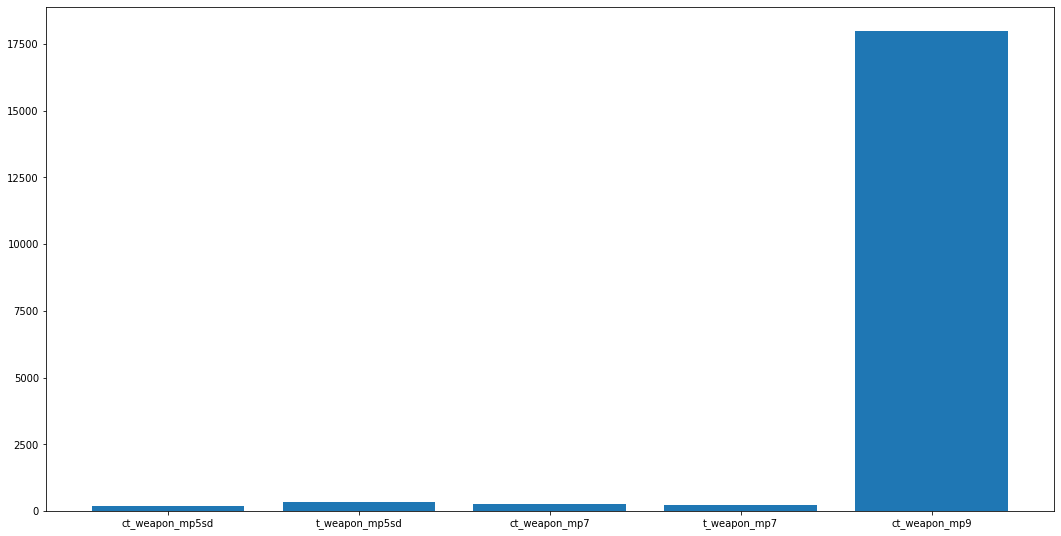

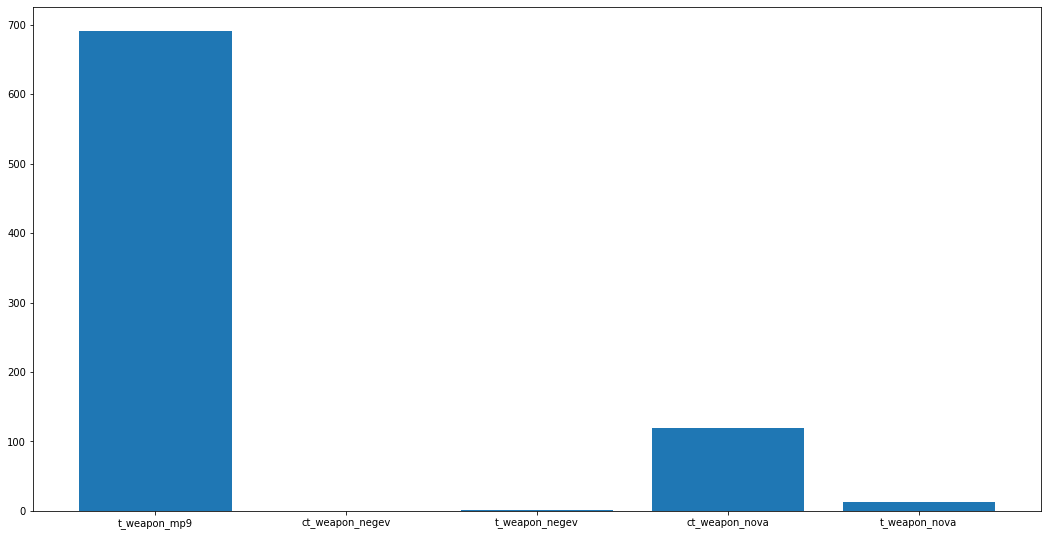

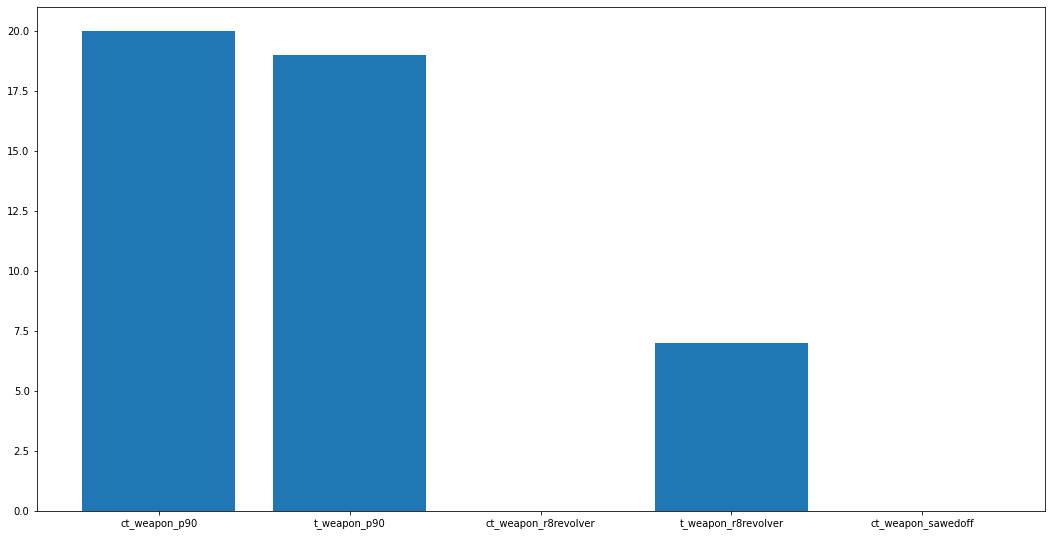

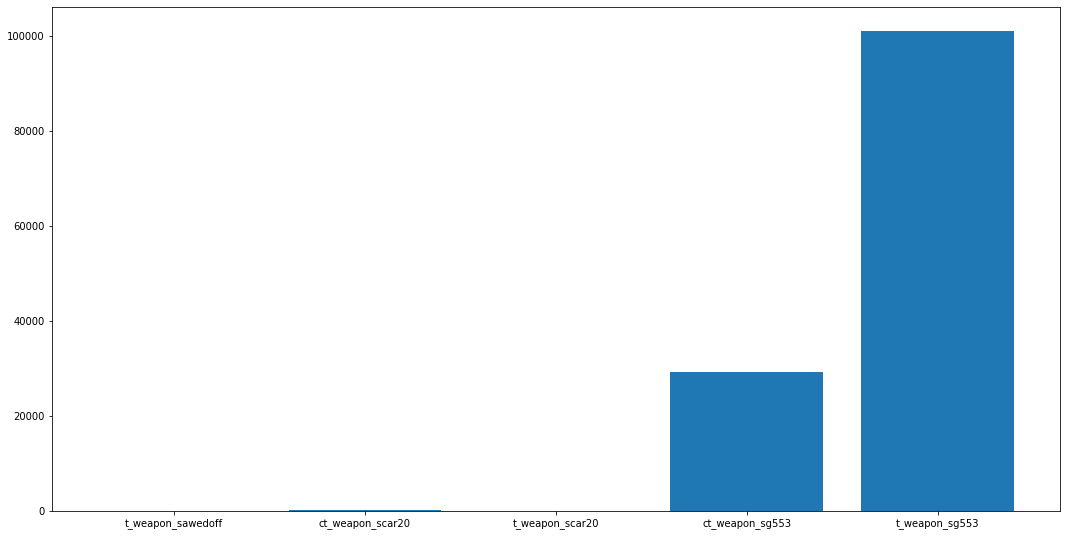

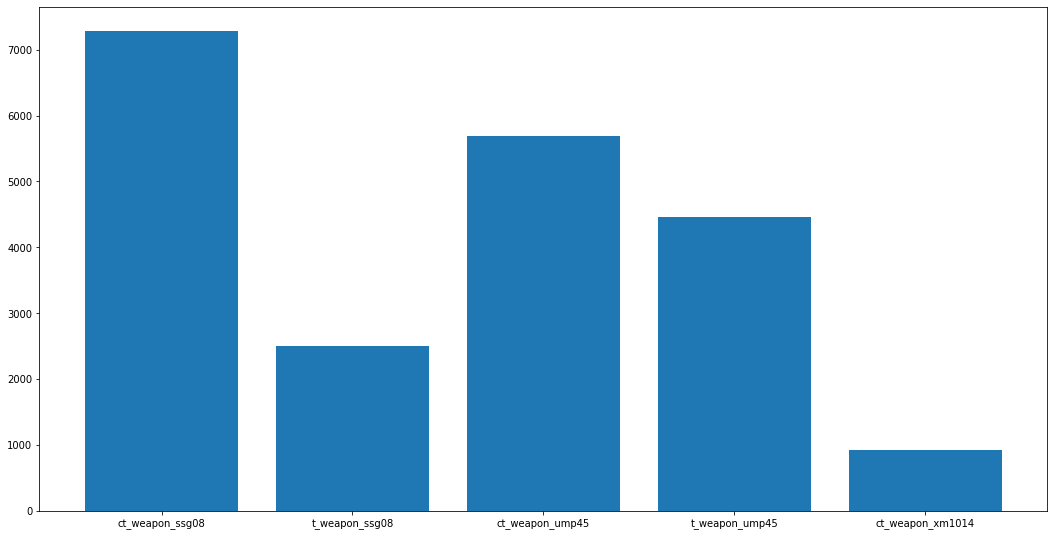

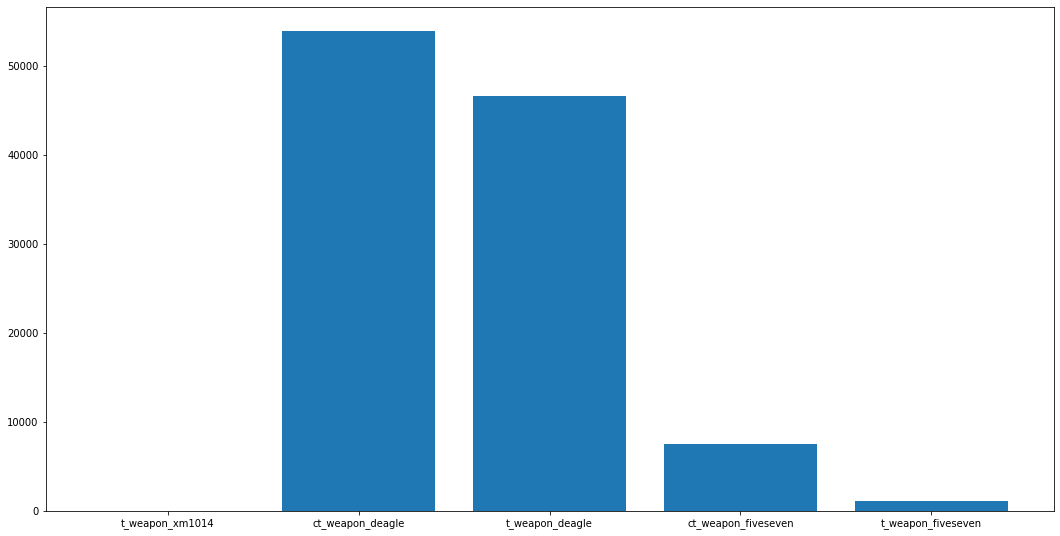

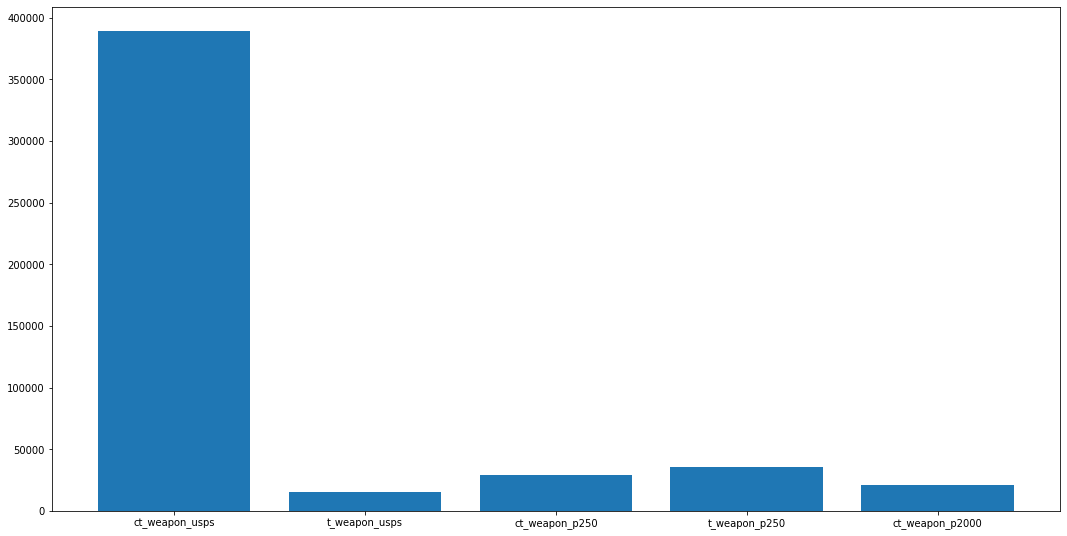

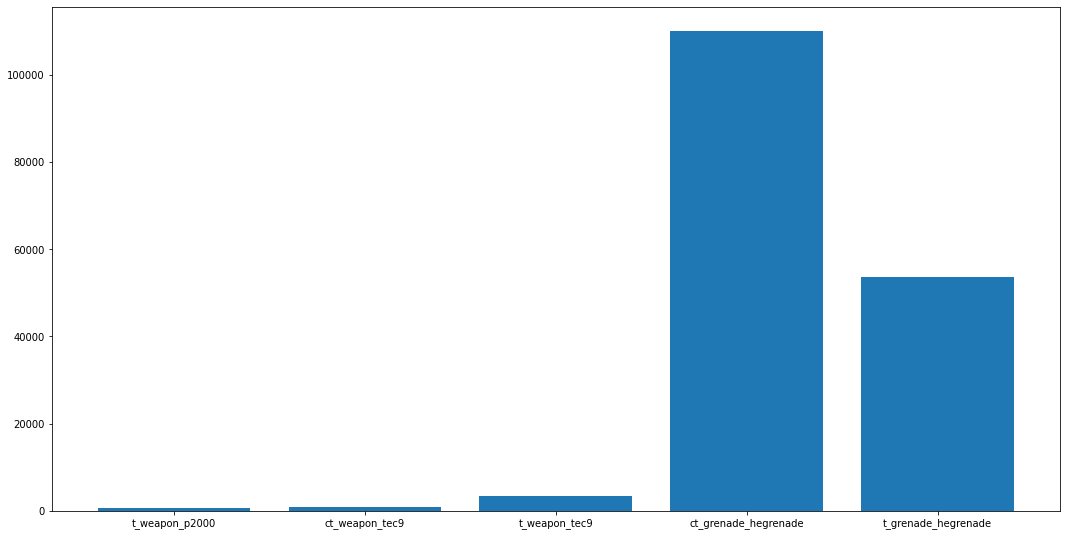

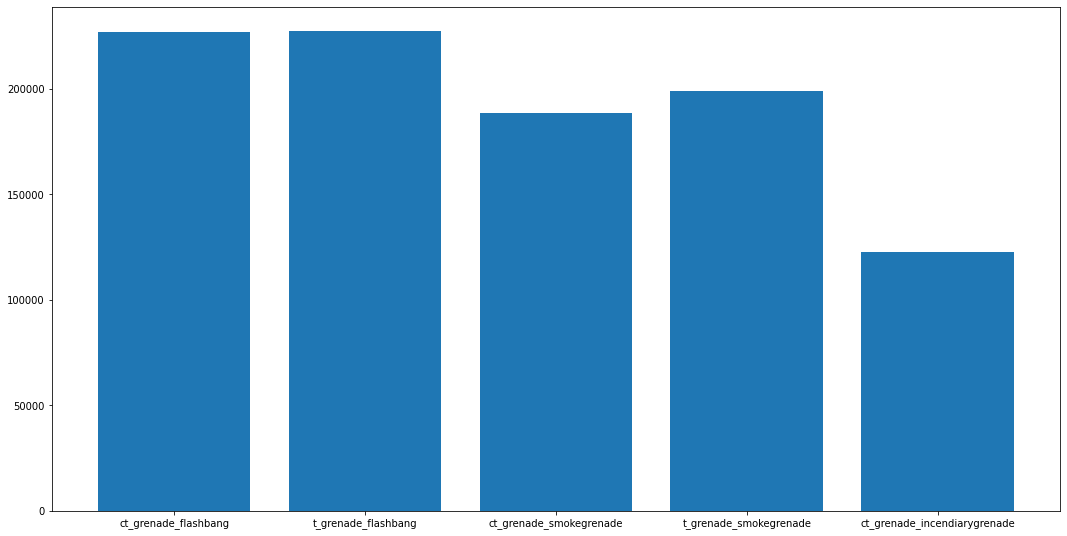

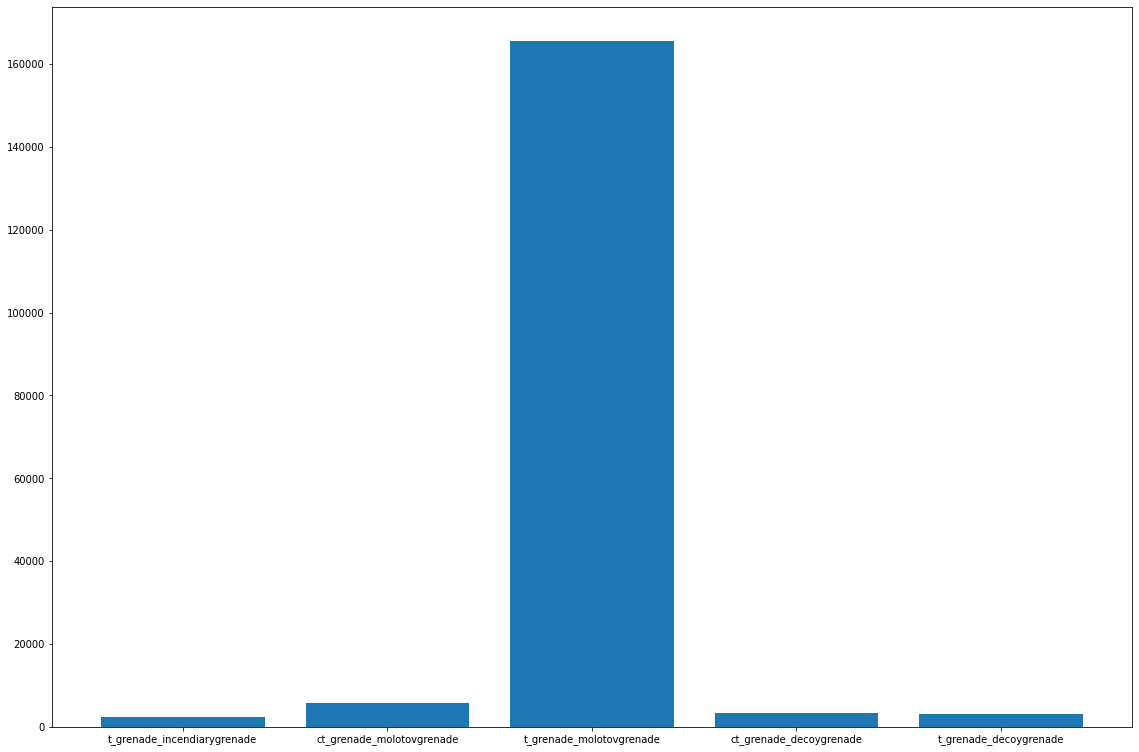

In [ ]:
featuresNaoArmas = ['time_left', 'ct_score',	't_score',	'map',	'bomb_planted',	'ct_health',
                    't_health',	'ct_armor',	't_armor',	'ct_money', 't_money',	'ct_helmets',
                    't_helmets',	'ct_defuse_kits',	'ct_players_alive',	't_players_alive', 'round_winner']
baseArmas = df.copy()
for i in featuresNaoArmas:
  baseArmas = baseArmas.drop([i], axis=1)
listaArmas = baseArmas.columns
quantidadeCadaArma = []
for i in listaArmas:
  arma = baseArmas[i]
  cont = 0
  for j in arma:
    cont += j
  quantidadeCadaArma.append(cont)

passo = 5
pontoAtual = 0
while passo < len(quantidadeCadaArma) - pontoAtual:
  fig = plt.figure(figsize=[14, 7])
  ax = fig.add_axes([0,0,1,1])
  ax.bar(listaArmas[pontoAtual: (pontoAtual + passo)],quantidadeCadaArma[pontoAtual: (pontoAtual + passo)])
  pontoAtual += passo
  plt.show()
if pontoAtual < len(quantidadeCadaArma):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(listaArmas[pontoAtual:],quantidadeCadaArma[pontoAtual:])
  pontoAtual += passo
  plt.show()


### Armas e utilitários mais usadas

Dentre as armas mais usadas é possível notar a predominância de alguns itens em cada categoria de armas. Dentro do jogo cada player pode carregar consigo uma pistola, uma arma principal e quatro utilitários, considerando isso é possível notar que dentre as armas e utilitários disponíveis no jogo alguns se destacam e são comumente comprados o que pode mostrar que esses equipamentos causam maior impacto do que os demais.

Se desconsideramos a pistola glock que já é dada ao player terrorista no começo de cada round podemos notar que existe uma pistola muito comprada pelos cotra terroristas e após ela temos o destaque de 3 granadas de forma consecutiva. Sabendo que pistolas tem pouco poder de fogo não seria ideal atribuir um maior peso a armas desse tipo ou um menor peso visto que rounds inicias não é comum algum jogador ter dinheiro suficiente para comprar um rifle. Temos então os utilitários que parecem ter um grande valor dentro de round podendo ser um ponto decisivo para a vitória.

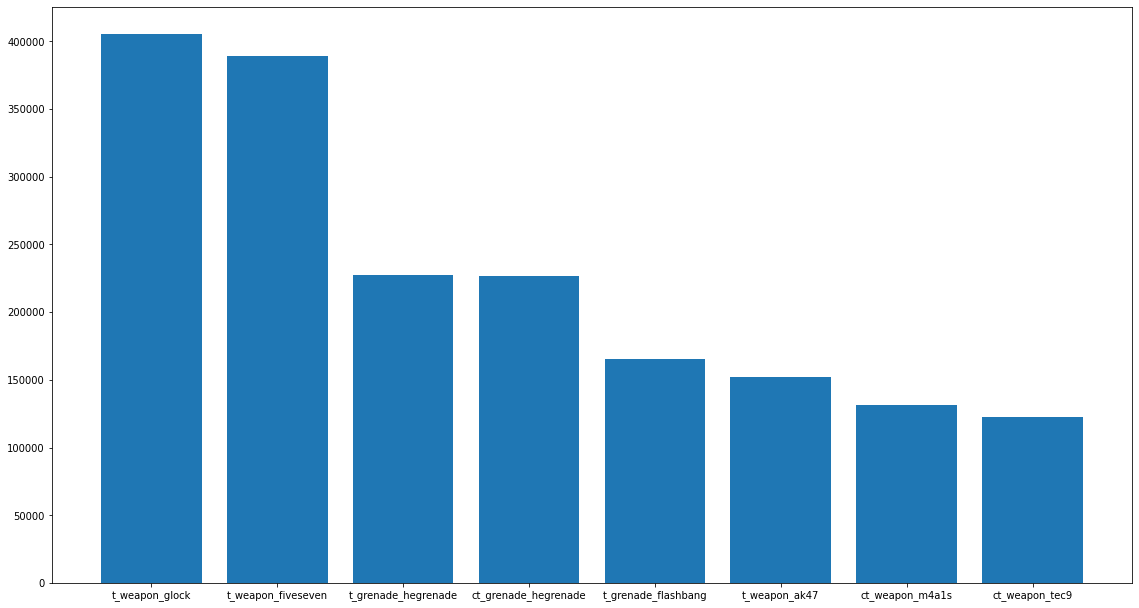

In [ ]:
nomeArmasMaisUsadas = []
quatidadeArmasMaisUsadas = []
qtdCadaArma = quantidadeCadaArma.copy()
for i in range(10):
  indice = qtdCadaArma.index(max(qtdCadaArma))
  quatidadeArmasMaisUsadas.append(qtdCadaArma[indice])
  nomeArmasMaisUsadas.append(listaArmas[indice])
  qtdCadaArma.pop(indice)

fig = plt.figure(figsize=[15, 8])
ax = fig.add_axes([1,1,1,1])
ax.bar(nomeArmasMaisUsadas, quatidadeArmasMaisUsadas)
plt.show()


# Apresentação do modelo

O modelo que será utilizado será o Modelo de Rede Neural Profunda Sequencial implementado no tensor utilizando a bilbioteca Keras como interface de comunicação.

O modelo escolhido pode ser construído "manualmente" definindo a quantidade de neunorios em cada camada e a função de ativação dentro de cada camada além de outras características.

*Descrição do Modelo Sequencial:*

O modelo Sequencial é apropriado quando temos um pilha simples de camadas, ou seja, apenas um tensor de entrada e um de saída. Os modelos sequenciais não são apropriados para as seguintes situações:

*    Seu modelo possui múltiplas entradas ou múltiplas saídas
*    Qualquer uma de suas camadas tem múltiplas entradas ou múltiplas saídas
*    Precisa fazer o compartilhamento de camadas
*    Precisa de uma topologia não linear (por exemplo, uma conexão residual, um modelo de vários ramos)

A imagem abaixo ilustra uma Rede Neural Sequencial

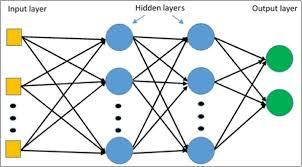


In [ ]:
import keras
import time
from keras.layers import Dense
from keras.models import  Sequential
from keras.utils import to_categorical
import tensorflow as tf

In [ ]:
#Pre-Processamento
#Transforma todos os valores não numéricos em numéricos


maps = df['map']
temp = {i: j for j, i in enumerate(set(maps))} 
res = [temp[i] for i in maps] 
df['map'] = res

bombs = df['bomb_planted']
temp = {i: j for j, i in enumerate(set(bombs))} 
res = [temp[i] for i in bombs] 
df['bomb_planted'] = res

round_winner = df['round_winner']
temp = {i: j for j, i in enumerate(set(round_winner))} 
res = [temp[i] for i in round_winner] 
df['round_winner'] = res

#df['round_winner'].head()
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,2,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,156.03,0.0,0.0,2,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,76.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,174.97,1.0,0.0,2,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
#Separação em x e y

dy = df[['round_winner']]
dx = df.drop(['round_winner'], axis=1)
dx.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,2,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,2,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,2,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Dividindo Train e Test e pegando o nome das classes

x_train, x_test, y_train, y_test = train_test_split(dx, dy, test_size=0.20, random_state=42)

print(x_train)

        time_left  ct_score  ...  ct_grenade_decoygrenade  t_grenade_decoygrenade
46932       33.46      13.0  ...                      0.0                     0.0
10028       51.48      15.0  ...                      0.0                     0.0
54116       94.90      17.0  ...                      0.0                     0.0
97546       99.70       4.0  ...                      0.0                     0.0
2964        94.89      11.0  ...                      0.0                     0.0
...           ...       ...  ...                      ...                     ...
119879     174.95       5.0  ...                      0.0                     0.0
103694      30.75       4.0  ...                      0.0                     0.0
860         74.95       4.0  ...                      1.0                     0.0
15795      114.91       0.0  ...                      0.0                     0.0
121958      54.94       4.0  ...                      0.0                     1.0

[97928 rows x 9

#### Executando o Modelo

In [ ]:
inicio = time.time()
# Criação e execução do modelo
model = Sequential()
model.add(Dense(200,activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(100,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

#Changing
y_train = to_categorical(y_train)

#Exibição do modelo
print(model.summary())

#Compilação e execução
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x = x_train, y=y_train, epochs=20)
#Tempo de criação e execução do modelo

fim = time.time()
ms_time = round((fim - inicio)*1000)
print("Tempo de criação e execução do modelo:",ms_time,"ms")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               19400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 52        
Total params: 45,877
Trainable params: 45,877
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3061/3061 [==============================] - 6s 2ms/step - loss: 9.8731 - accuracy: 0.6409
Epoch 2/20


In [ ]:
#Score

percentages = model.predict(x_test)
print("Vetor de probabilidades\n",percentages)

predictions = []
for i in range(0,percentages.shape[0]):
  if percentages[i][0] > percentages[i][1]:
    predictions.append(0)
  else: 
    predictions.append(1)

hits=0
for i in range(0,y_test.shape[0]):
  if predictions[i] == int(y_test.iloc[i]):
    hits+=1

score = hits/y_test.shape[0]*100
print("\nScore:",score,"%")

Vetor de probabilidades
 [[3.9752182e-01 6.0247821e-01]
 [5.6864452e-01 4.3135548e-01]
 [5.9231720e-03 9.9407685e-01]
 ...
 [9.9992621e-01 7.3784729e-05]
 [9.8464884e-02 9.0153515e-01]
 [7.0666337e-01 2.9333663e-01]]

Score: 73.31508863654929 %


## Registros 

Registros de score e tempo obtidos nas diferentes versões do código.

### Score
##### Score do modelo v1(10 epochs): Score: 73.9277836778041 %
##### Score do modelo v1(20 epochs): Score: 75.08373498897149 %

### Tempo

##### Tempo de criação e execução do modelo v1(10 epochs): 61345 ms.
##### Tempo de criação e execução do modelo v1(20 epochs): 132633 ms

#Apresentação de ideias e estratégias para realização das transformações nos dados da base

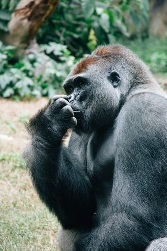

# Parte II

Nesta base de dados é possível retirar algumas features como também é possível transformas novas features em uma única feature.

### Feature Poder de Fogo usando DPS.

Uma nova feature a ser adicionada na base de dados utilizando de conhecimentos além dos existentes na base de dados é criar um nova informação sobre poder de fogo total dos times já que essa informação é bastante relevante para determinar o time vencedor no round

In [ ]:
#Gustavim faz a feature de poder de fogo

# Por favor não utilizar mesmo nome para o data frame modificado
# construir feature de poder de fogo pelo valor PODER DE FOGO * PENETRACAO ARMADURA
# link da base dados com as informações
# https://docs.google.com/spreadsheets/d/1C7S81mWzjSfo0nCSuP_WpXKNYoI8V2KZhodKj3DBNiE/edit#gid=0
# A feature ct_poderFogo e t_poderFogo será a somatória das armas usadas naquela instancia

#lista das armas e seu dano * munição:
#dano = [['Glock', 600], ['M249', 3200], ['M4A1', 660], ['M4A4', 990], ['MAC-10', 870],
#                 ['MAG-7', 1200], ['MP5', 810], ['MP7', 870], ['MP9', 780], ['Negev', 5250], ['Nova', 1872], ['P90', 1300],
#                  ['Revolver', 688], ['Sawed-off', 1792], ['SCAR', 1600], ['SG', 900], ['SSG', 880], ['UMP', 875], ['XM1014', 840],
#                  ['Desert Eagle', 441], ['Five-Seven', 640], ['USP', 420], ['P250', 494], ['P2000', 455], ['Tec-9', 792],
#                  ['HE', 100], ['Flashbang', 0], ['Smoke', 0], ['Incendiaria', 35], ['Molotov', 35], ['Granada', 98]]

#lista da penetração da arma * DPS:
power = [['ak-47', 271.25], ['AUG', 243], ['AWP', 76.05], ['Bizon', 204.75], ['CZ75', 232.95], ['Berettas', 177.1], ['FAMAS', 225.4], ['G3SG1', 260.7], 
         ['Galil', 249.55], ['Glock', 90.71], ['M249', 310.4], ['M4A1', 249.2], ['M4A4', 224], ['MAC-10', 214.47], ['MAG-7', 1.644], ['MP5', 203.125],
         ['MP7', 218.75], ['MP9', 2014.2], ['Negev', 321.63], ['Nova', 1.1815], ['P90', 246.33], ['Revolver', 158.44], ['Sawed-off', 1.7505], ['SCAR', 260.7],
         ['SG', 264], ['SSG', 59.5], ['UMP', 245.7], ['XM1014', 1.6184], ['Desert Eagle', 257.232], ['Five-Seven', 188.681], ['USP', 245.7], ['P250', 158.08],
         ['P2000', 101], ['Tec-9', 241.902], ['HE', 1], ['Flashbang', 1], ['Smoke', 1], ['Incendiaria', 50], ['Molotov', 50], ['Granada', 100]]

#lista com as colunas necessárias para a construção das features:
lista = ['ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon',
         't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas',
         't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock',
         't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4',
         'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7',
         't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
         'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver', 't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
         'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553', 't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08', 'ct_weapon_ump45',
         't_weapon_ump45', 'ct_weapon_xm1014', 't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle', 'ct_weapon_fiveseven',
         't_weapon_fiveseven', 'ct_weapon_usps', 't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000', 't_weapon_p2000',
         'ct_weapon_tec9', 't_weapon_tec9', 'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang', 't_grenade_flashbang',
         'ct_grenade_smokegrenade', 't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade', 't_grenade_incendiarygrenade',
         'ct_grenade_molotovgrenade', 't_grenade_molotovgrenade', 'ct_grenade_decoygrenade', 't_grenade_decoygrenade']

In [ ]:
data_frame = pd.read_csv('/content/drive/Shareddrives/Krunkerzeiros.IO/Análise/Atividade4/csgo_round_snapshots.csv')
vencedor =  data_frame[['round_winner']]
data_frame = data_frame.drop(['round_winner'], axis=1)
mean_power_fire = []

count_list_features = 0
for i in range(0,data_frame.shape[0]):
  total = 0
  k = 0
  for j in range(0, len(lista), 2):
    total = total + df[lista[j]][i] * power[k][1]
    k = k + 1
  mean_power_fire.append(total/5)

data_frame['power_fire_ct'] = pd.DataFrame(mean_power_fire)

mean_power_fire.clear()
count_list_features = 0
for i in range(0,data_frame.shape[0]):
  total = 0
  k = 0
  for j in range(1, len(lista), 2):
    total = total + df[lista[j]][i] * power[k][1]
    k = k + 1
  mean_power_fire.append(total/5)

data_frame['power_fire_t'] = pd.DataFrame(mean_power_fire)
data_frame['round_winner'] = vencedor
data_frame.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,power_fire_ct,power_fire_t,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.76,90.710,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,216.76,91.110,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,196.56,72.968,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.56,74.626,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.76,90.710,CT


#### Executando o modelo com a nova feature:

In [ ]:
#Pre-Processamento: transforma todos os valores não numéricos em numéricos

maps = data_frame['map']
temp = {i: j for j, i in enumerate(set(maps))} 
res = [temp[i] for i in maps] 
data_frame['map'] = res

bombs = data_frame['bomb_planted']
temp = {i: j for j, i in enumerate(set(bombs))} 
res = [temp[i] for i in bombs] 
data_frame['bomb_planted'] = res

round_winner = data_frame['round_winner']
temp = {i: j for j, i in enumerate(set(round_winner))} 
res = [temp[i] for i in round_winner] 
data_frame['round_winner'] = res

data_frame.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,power_fire_ct,power_fire_t,round_winner
0,175.00,0.0,0.0,2,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.76,90.710,1
1,156.03,0.0,0.0,2,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,216.76,91.110,1
2,96.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,196.56,72.968,1
3,76.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.56,74.626,1
4,174.97,1.0,0.0,2,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.76,90.710,1


In [ ]:
#Separação em x e y

dy = data_frame[['round_winner']]
dx = data_frame.drop(['round_winner'], axis=1)

dx.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,power_fire_ct,power_fire_t
0,175.00,0.0,0.0,2,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.76,90.710
1,156.03,0.0,0.0,2,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,216.76,91.110
2,96.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,196.56,72.968
3,76.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.56,74.626
4,174.97,1.0,0.0,2,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.76,90.710


In [ ]:
#Importando bibliotecas:
import keras
import time
from keras.layers import Dense
from keras.models import  Sequential
from keras.utils import to_categorical
import tensorflow as tf

In [ ]:
#Dividindo Train e Test e pegando o nome das classes

x_train, x_test, y_train, y_test = train_test_split(dx, dy, test_size=0.20, random_state=42)

class_names = []
for i in data_frame:
  class_names.append(i)

x_train.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,power_fire_ct,power_fire_t
46932,33.46,13.0,15.0,1,1,338.0,80.0,384.0,85.0,18850.0,4700.0,4.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,365.2024,150.8364
10028,51.48,15.0,7.0,7,0,300.0,212.0,300.0,342.0,300.0,1450.0,2.0,4.0,1.0,3.0,4.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,296.0200,299.9760
54116,94.90,17.0,15.0,3,0,381.0,495.0,400.0,497.0,30900.0,21100.0,4.0,5.0,4.0,4.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,4.0,4.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0,327.9044,410.4224
97546,99.70,4.0,5.0,1,0,500.0,274.0,451.0,367.0,34850.0,150.0,4.0,4.0,4.0,5.0,4.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,1.0,5.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,492.0664,310.5680
2964,94.89,11.0,12.0,6,0,500.0,500.0,486.0,500.0,24400.0,200.0,5.0,5.0,5.0,5.0,5.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,449.6748,361.7100


In [ ]:
inicio = time.time()
# Criação e execução do modelo
model = Sequential()
model.add(Dense(200,activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(100,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

#Changing
y_train = to_categorical(y_train)

#Exibição do modelo
print(model.summary())

#Compilação e execução
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x = x_train, y=y_train, epochs=20)
#Tempo de criação e execução do modelo

fim = time.time()
ms_time = round((fim - inicio)*1000)
print("Tempo de criação e execução do modelo:",ms_time,"ms")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               19800     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 52        
Total params: 46,277
Trainable params: 46,277
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3061/3061 [==============================] - 6s 2ms/step - loss: 7.4075 - accuracy: 0.6365
Epoch 2/2

#### Resultado obtido:

In [ ]:
#Score

percentages = model.predict(x_test)
print("Vetor de probabilidades\n",percentages)

predictions = []
for i in range(0,percentages.shape[0]):
  if percentages[i][0] > percentages[i][1]:
    predictions.append(0)
  else: 
    predictions.append(1)

hits=0
for i in range(0,y_test.shape[0]):
  if predictions[i] == int(y_test.iloc[i]):
    hits+=1

score = hits/y_test.shape[0]*100
print("\nScore:",score,"%")

Vetor de probabilidades
 [[4.6775281e-01 5.3224725e-01]
 [6.5327251e-01 3.4672743e-01]
 [2.6582577e-03 9.9734169e-01]
 ...
 [9.9976844e-01 2.3160869e-04]
 [7.9498649e-02 9.2050135e-01]
 [8.8702124e-01 1.1297869e-01]]

Score: 73.86242954007025 %


#### Feature poder de fogo utilizando média de dano:

In [ ]:
power = [['ak-47', 163.1375], ['AUG', 146.25], ['AWP', 149.66], ['Bizon', 119.07], ['CZ75', 140.1583], ['Berettas', 110.1125], ['FAMAS', 133.35], ['G3SG1', 195.9375], 
         ['Galil', 147.6365], ['Glock', 59.22], ['M249', 180.4], ['M4A1', 147.35], ['M4A4', 134.75], ['MAC-10', 123.625], ['MAG-7', 99.44738], ['MP5', 118.125],
         ['MP7', 127.1875], ['MP9', 122.4], ['Negev', 185.31], ['Nova', 64.8407], ['P90', 140.76], ['Revolver', 158.90], ['Sawed-off', 105.8753], ['SCAR', 195.9375],
         ['SG', 161.5], ['SSG', 104.125], ['UMP', 145.275], ['XM1014', 56.0092], ['Desert Eagle', 186.86], ['Five-Seven', 123.05], ['USP', 67.92], ['P250', 103.04],
         ['P2000', 67.9225], ['Tec-9', 150.396], ['HE', 1], ['Flashbang', 1], ['Smoke', 1], ['Incendiaria', 50], ['Molotov', 50], ['Granada', 100]]

data_set = pd.read_csv('/content/drive/Shareddrives/Krunkerzeiros.IO/Análise/Atividade4/csgo_round_snapshots.csv')
vencedor =  data_set[['round_winner']]
data_set = data_set.drop(['round_winner'], axis=1)
mean_power_fire = []

count_list_features = 0
for i in range(0,data_set.shape[0]):
  total = 0
  k = 0
  for j in range(0, len(lista), 2):
    total = total + (data_set[lista[j]][i] * (power[k][1] * quantidadeCadaArma[j]/1000))
    k = k + 1
  mean_power_fire.append(total/5)

data_set['power_fire_ct'] = pd.DataFrame(mean_power_fire)

mean_power_fire.clear()
count_list_features = 0
for i in range(0,data_set.shape[0]):
  total = 0
  k = 0
  for j in range(1, len(lista), 2):
    total = total + (data_set[lista[j]][i] * (power[k][1] * quantidadeCadaArma[j]/1000))
    k = k + 1
  mean_power_fire.append(total/5)

data_set['power_fire_t'] = pd.DataFrame(mean_power_fire)
data_set['round_winner'] = vencedor
data_set.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,power_fire_ct,power_fire_t,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21439.053740,23996.003220,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21439.053740,24075.674820,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21149.635968,19276.474176,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21149.635968,14405.806970,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21439.053740,23996.003220,CT


#### Executando modelo com nova feature:

In [ ]:
#Pre-Processamento: transforma todos os valores não numéricos em numéricos

maps = data_set['map']
temp = {i: j for j, i in enumerate(set(maps))} 
res = [temp[i] for i in maps] 
data_set['map'] = res

bombs = data_set['bomb_planted']
temp = {i: j for j, i in enumerate(set(bombs))} 
res = [temp[i] for i in bombs] 
data_set['bomb_planted'] = res

round_winner = data_set['round_winner']
temp = {i: j for j, i in enumerate(set(round_winner))} 
res = [temp[i] for i in round_winner] 
data_set['round_winner'] = res

data_set.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,power_fire_ct,power_fire_t,round_winner
0,175.00,0.0,0.0,2,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21439.053740,23996.003220,1
1,156.03,0.0,0.0,2,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21439.053740,24075.674820,1
2,96.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21149.635968,19276.474176,1
3,76.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21149.635968,14405.806970,1
4,174.97,1.0,0.0,2,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21439.053740,23996.003220,1


In [ ]:
#Separação em x e y

dy = data_set[['round_winner']]
dx = data_set.drop(['round_winner'], axis=1)

dx.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,power_fire_ct,power_fire_t
0,175.00,0.0,0.0,2,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21439.053740,23996.003220
1,156.03,0.0,0.0,2,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21439.053740,24075.674820
2,96.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21149.635968,19276.474176
3,76.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21149.635968,14405.806970
4,174.97,1.0,0.0,2,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21439.053740,23996.003220


In [ ]:
#Importando bibliotecas:
import keras
import time
from keras.layers import Dense
from keras.models import  Sequential
from keras.utils import to_categorical
import tensorflow as tf

In [ ]:
import scipy
#Dividindo Train e Test e pegando o nome das classes

x_train, x_test, y_train, y_test = train_test_split(dx, dy, test_size=0.20, random_state=42)

class_names = []
for i in data_set:
  class_names.append(i)

x_train['power_fire_ct'] = scipy.stats.boxcox(x_train['power_fire_ct']+1,lmbda=0.5, alpha=None)
x_train['power_fire_t'] = scipy.stats.boxcox(x_train['power_fire_t']+1,lmbda=0.5, alpha=None)

x_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,power_fire_ct,power_fire_t
46932,33.46,13.0,15.0,1,1,338.0,80.0,384.0,85.0,18850.0,4700.0,4.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,270.492861,144.546248
10028,51.48,15.0,7.0,7,0,300.0,212.0,300.0,342.0,300.0,1450.0,2.0,4.0,1.0,3.0,4.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,312.727503,359.911434
54116,94.90,17.0,15.0,3,0,381.0,495.0,400.0,497.0,30900.0,21100.0,4.0,5.0,4.0,4.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,4.0,4.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0,285.190613,366.893454
97546,99.70,4.0,5.0,1,0,500.0,274.0,451.0,367.0,34850.0,150.0,4.0,4.0,4.0,5.0,4.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,1.0,5.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,390.455979,410.583841
2964,94.89,11.0,12.0,6,0,500.0,500.0,486.0,500.0,24400.0,200.0,5.0,5.0,5.0,5.0,5.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,334.278053,433.346482


In [ ]:
inicio = time.time()
# Criação e execução do modelo
model = Sequential()
model.add(Dense(200,activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(100,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

#Changing
y_train = to_categorical(y_train)

#Exibição do modelo
print(model.summary())

#Compilação e execução
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x = x_train, y=y_train, epochs=20)
#Tempo de criação e execução do modelo

fim = time.time()
ms_time = round((fim - inicio)*1000)
print("Tempo de criação e execução do modelo:",ms_time,"ms")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 200)               19800     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_13 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 52        
Total params: 46,277
Trainable params: 46,277
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3061/3061 [==============================] - 6s 2ms/step - loss: 14.0294 - accuracy: 0.6389
Epoch 2/

In [ ]:
#Score

percentages = model.predict(x_test)
print("Vetor de probabilidades\n",percentages)

predictions = []
for i in range(0,percentages.shape[0]):
  if percentages[i][0] > percentages[i][1]:
    predictions.append(0)
  else: 
    predictions.append(1)

hits=0
for i in range(0,y_test.shape[0]):
  if predictions[i] == int(y_test.iloc[i]):
    hits+=1

score = hits/y_test.shape[0]*100
print("\nScore:",score,"%")

Vetor de probabilidades
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]

Score: 59.860305530593905 %


### Feature Utilitários

Uma característica que pode substituir algumas colunas já existem na base de dados é criar uma unica coluna contendo a quantidade total de utilitarios de cada, no modelo atual é colocada a quantidade de cada uma das granadas. Assim poderiamos ter no final duas colunas ct_utilitarios e t_utilitarios ao invés de termos 10 colunas.

In [ ]:
# Vitor faz a feature de utilitários

# Por favor não utilizar mesmo nome para o data frame modificado

#Contruir uma feature unica de ct_utilitarios t_utilitarios que seja 
# a somatoria dos outros utilitarios para representar todos eles é uma unica 
# coluna remova as outras features de utilitarios padrão
dataFrame = pd.read_csv('/content/drive/Shareddrives/Krunkerzeiros.IO/Análise/Atividade4/csgo_round_snapshots.csv')

colunaVencedor = 'round_winner'
utilitariosCT = ['ct_grenade_hegrenade','ct_grenade_flashbang', 'ct_grenade_smokegrenade', 
    'ct_grenade_incendiarygrenade','ct_grenade_molotovgrenade','ct_grenade_decoygrenade',]
utilitariosT = ['t_grenade_hegrenade', 't_grenade_flashbang', 't_grenade_smokegrenade', 't_grenade_incendiarygrenade',
                  't_grenade_molotovgrenade', 't_grenade_decoygrenade']

dataFrameSemGranadas = pd.DataFrame()
dataFrameDasGranadas = pd.DataFrame()
for i in dataFrame.columns:
  if i not in utilitariosCT and i not in utilitariosT and i != colunaVencedor:
    dataFrameSemGranadas[i] = dataFrame[i].copy()
  else:
    if i != colunaVencedor:
      dataFrameDasGranadas[i] = dataFrame[i].copy()

ct_utilitarios = []
t_utilitarios = []

colunas = dataFrameDasGranadas.columns
for i in range(dataFrameDasGranadas.shape[0]):
  linha = dataFrameDasGranadas.iloc[i]
  ct_utilitarios.append(0)
  t_utilitarios.append(0)
  for j in range(len(linha)):   
    if colunas[j] in utilitariosCT:
      ct_utilitarios[-1] += linha[j]
    else:
      t_utilitarios[-1] += linha[j]


ct_utilitarios = pd.DataFrame({'ct_utilitarios': ct_utilitarios})
t_utilitarios = pd.DataFrame({'t_utilitarios': t_utilitarios})

dataFrameComGranadas = dataFrameSemGranadas.copy()
dataFrameComGranadas[ct_utilitarios.columns] = ct_utilitarios
dataFrameComGranadas[t_utilitarios.columns] = t_utilitarios
dataFrameComGranadas[colunaVencedor] = dataFrame[colunaVencedor]

In [ ]:
#Pre-Processamento
#Transforma todos os valores não numéricos em numéricos


maps = dataFrameComGranadas['map']
temp = {i: j for j, i in enumerate(set(maps))} 
res = [temp[i] for i in maps] 
dataFrameComGranadas['map'] = res

bombs = dataFrameComGranadas['bomb_planted']
temp = {i: j for j, i in enumerate(set(bombs))} 
res = [temp[i] for i in bombs] 
dataFrameComGranadas['bomb_planted'] = res

round_winner = dataFrameComGranadas['round_winner']
temp = {i: j for j, i in enumerate(set(round_winner))} 
res = [temp[i] for i in round_winner] 
dataFrameComGranadas['round_winner'] = res

dataFrameComGranadas

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_utilitarios,t_utilitarios,round_winner
0,175.00,0.0,0.0,2,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,156.03,0.0,0.0,2,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1
2,96.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
3,76.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,174.97,1.0,0.0,2,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,4.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,3.0,0
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,2.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
#Separação em x e y

dy = dataFrameComGranadas[['round_winner']]
dx = dataFrameComGranadas.drop(['round_winner'], axis=1)

#### Executando o Modelo com a nova feature adicionada:

In [ ]:
import keras
import time
from keras.layers import Dense
from keras.models import  Sequential
from keras.utils import to_categorical
import tensorflow as tf

In [ ]:
#Dividindo Train e Test e pegando o nome das classes

x_train, x_test, y_train, y_test = train_test_split(dx, dy, test_size=0.20, random_state=42)

class_names = []
for i in dataFrameComGranadas:
  class_names.append(i)

x_train.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_utilitarios,t_utilitarios
46932,33.46,13.0,15.0,1,1,338.0,80.0,384.0,85.0,18850.0,4700.0,4.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
10028,51.48,15.0,7.0,7,0,300.0,212.0,300.0,342.0,300.0,1450.0,2.0,4.0,1.0,3.0,4.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0
54116,94.90,17.0,15.0,3,0,381.0,495.0,400.0,497.0,30900.0,21100.0,4.0,5.0,4.0,4.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,13.0,11.0
97546,99.70,4.0,5.0,1,0,500.0,274.0,451.0,367.0,34850.0,150.0,4.0,4.0,4.0,5.0,4.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,7.0
2964,94.89,11.0,12.0,6,0,500.0,500.0,486.0,500.0,24400.0,200.0,5.0,5.0,5.0,5.0,5.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0


In [ ]:
inicio = time.time()
# Criação e execução do modelo
model = Sequential()
model.add(Dense(200,activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(100,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

#Changing
y_train = to_categorical(y_train)

#Exibição do modelo
print(model.summary())

#Compilação e execução
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x = x_train, y=y_train, epochs=20)
#Tempo de criação e execução do modelo

fim = time.time()
ms_time = round((fim - inicio)*1000)
print("Tempo de criação e execução do modelo:",ms_time,"ms")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 200)               17400     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_18 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 52        
Total params: 43,877
Trainable params: 43,877
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3061/3061 [==============================] - 6s 2ms/step - loss: 10.5793 - accuracy: 0.6308
Epoch 2/

#### Resultado Obtido

In [ ]:
#Score

percentages = model.predict(x_test)
print("Vetor de probabilidades\n",percentages)

predictions = []
for i in range(0,percentages.shape[0]):
  if percentages[i][0] > percentages[i][1]:
    predictions.append(0)
  else: 
    predictions.append(1)

hits=0
for i in range(0,y_test.shape[0]):
  if predictions[i] == int(y_test.iloc[i]):
    hits+=1

score = hits/y_test.shape[0]*100
print("\nScore:",score,"%")

Vetor de probabilidades
 [[3.3554333e-01 6.6445661e-01]
 [5.8564591e-01 4.1435409e-01]
 [4.0842486e-03 9.9591571e-01]
 ...
 [9.9938834e-01 6.1159144e-04]
 [1.6086197e-01 8.3913803e-01]
 [9.4344974e-01 5.6550272e-02]]

Score: 74.9407728126787 %


#### Resultado
Score 10 Epochs 74.39%, Tempo de criação e execução do modelo: 58858 ms

Score 20 Epochs 74.70%, Tempo de criação e execução do modelo: 131851 ms

### Aplicando algoritmo de PCA

O PCA é um método para a diminuição de dimensionalidade de uma base de dados. É executado através dos seguintes passos:

1-Tornando a média das colunas = 0, por subtrair os valores da coluna pela média da coluna. Isso irá gerar uma matriz auxiliar denominada M.

2-Determina a matriz de covariança, utilizando o desvio padrão.

3- Determina-se autovetores e autovalores.

4- Ao fim, ordena-se os autovalores em ordem descrescente, e então se calcula a variância explicada e acumulada de cada autovalor. 

In [ ]:
#Pre-Processamento
#Transforma todos os valores não numéricos em numéricos
df = pd.read_csv('/content/drive/Shareddrives/Krunkerzeiros.IO/Análise/Atividade4/csgo_round_snapshots.csv')

maps = df['map']
temp = {i: j for j, i in enumerate(set(maps))} 
res = [temp[i] for i in maps] 
df['map'] = res

bombs = df['bomb_planted']
temp = {i: j for j, i in enumerate(set(bombs))} 
res = [temp[i] for i in bombs] 
df['bomb_planted'] = res

round_winner = df['round_winner']
temp = {i: j for j, i in enumerate(set(round_winner))} 
res = [temp[i] for i in round_winner] 
df['round_winner'] = res

In [ ]:
#Separação em x e y

dy = df[['round_winner']]
dx = df.drop(['round_winner'], axis=1)
dx.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,2,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,2,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,2,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,2,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import PCA

n = int(dx.shape[1]/1.2)
pca = PCA(n_components=n)
pca.fit(dx)

PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
class_number = [x for x in range(0,n)]

dx = pca.transform(dx)
dx = pd.DataFrame(dx,columns=class_number)

In [ ]:
#Dividindo Train e Test e pegando o nome das classes

x_train, x_test, y_train, y_test = train_test_split(dx, dy, test_size=0.20, random_state=42)

print(x_train)

                  0             1           2   ...        77        78        79
46932     592.709301  11159.945331  256.409283  ...  0.000492  0.000786  0.000088
10028  -13578.859139  -1243.255082  101.274387  ... -0.002825  0.001289 -0.001469
54116   20923.945736  10248.286704 -167.438439  ... -0.001192 -0.004421  0.000587
97546    7092.077198  26471.919192  -87.752667  ... -0.002920 -0.001916  0.000237
2964      573.409626  18304.381661 -286.978823  ... -0.002310 -0.003106  0.000743
...              ...           ...         ...  ...       ...       ...       ...
119879  31221.087493 -14105.170803  180.825506  ...  0.005198  0.001635 -0.000553
103694  -9002.007489   3159.690392  -37.546344  ...  0.002258  0.001344  0.000408
860     -9218.103348  -4757.219824 -186.943743  ... -0.004824 -0.004798 -0.000466
15795  -14035.680260   -616.765602 -141.747041  ... -0.000093 -0.000918 -0.000588
121958 -14262.537586   -498.581334 -186.142868  ... -0.012921 -0.003442 -0.000680

[97928 rows x 8

In [ ]:
inicio = time.time()
# Criação e execução do modelo
model = Sequential()
model.add(Dense(200,activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(100,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

#Changing
y_train = to_categorical(y_train)

#Exibição do modelo
print(model.summary())

#Compilação e execução
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x = x_train, y=y_train, epochs=20)
#Tempo de criação e execução do modelo

fim = time.time()
ms_time = round((fim - inicio)*1000)
print("Tempo de criação e execução do modelo:",ms_time,"ms")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 200)               16200     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_22 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_23 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 52        
Total params: 42,677
Trainable params: 42,677
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3061/3061 [==============================] - 6s 2ms/step - loss: 11.8736 - accuracy: 0.6493
Epoch 2/

In [ ]:
#Score

percentages = model.predict(x_test)
print("Vetor de probabilidades\n",percentages)

predictions = []
for i in range(0,percentages.shape[0]):
  if percentages[i][0] > percentages[i][1]:
    predictions.append(0)
  else: 
    predictions.append(1)

hits=0
for i in range(0,y_test.shape[0]):
  if predictions[i] == int(y_test.iloc[i]):
    hits+=1

score = hits/y_test.shape[0]*100
print("\nScore:",score,"%")

Vetor de probabilidades
 [[0.4974359  0.5025641 ]
 [0.66685516 0.3331448 ]
 [0.02050552 0.97949445]
 ...
 [0.9916875  0.00831255]
 [0.14472823 0.85527176]
 [0.86605036 0.13394967]]

Score: 73.7970754023364 %


####Score 

######10 epochs: 74.9407728126787 %
######20 epochs: 75.18176619557225 %
######20 epochs: 74.79372600277755 % (resultado do vitao)

####Tempo

#####10 epochs:  56702 ms
#####20 epochs: 111686 ms

### Simetria entre as variáveis

In [ ]:
import keras
import time
from keras.layers import Dense
from keras.models import  Sequential
from keras.utils import to_categorical
import tensorflow as tf
import scipy

In [ ]:
d_norm = pd.read_csv('/content/drive/Shareddrives/Krunkerzeiros.IO/Análise/Atividade4/csgo_round_snapshots.csv')

In [ ]:
#Pre-Processamento
#Transforma todos os valores não numéricos em numéricos


maps = d_norm['map']
temp = {i: j for j, i in enumerate(set(maps))} 
res = [temp[i] for i in maps] 
d_norm['map'] = res

bombs = d_norm['bomb_planted']
temp = {i: j for j, i in enumerate(set(bombs))} 
res = [temp[i] for i in bombs] 
d_norm['bomb_planted'] = res

round_winner = d_norm['round_winner']
temp = {i: j for j, i in enumerate(set(round_winner))} 
res = [temp[i] for i in round_winner] 
d_norm['round_winner'] = res

d_norm['round_winner'].head()

0    1
1    1
2    1
3    1
4    1
Name: round_winner, dtype: int64

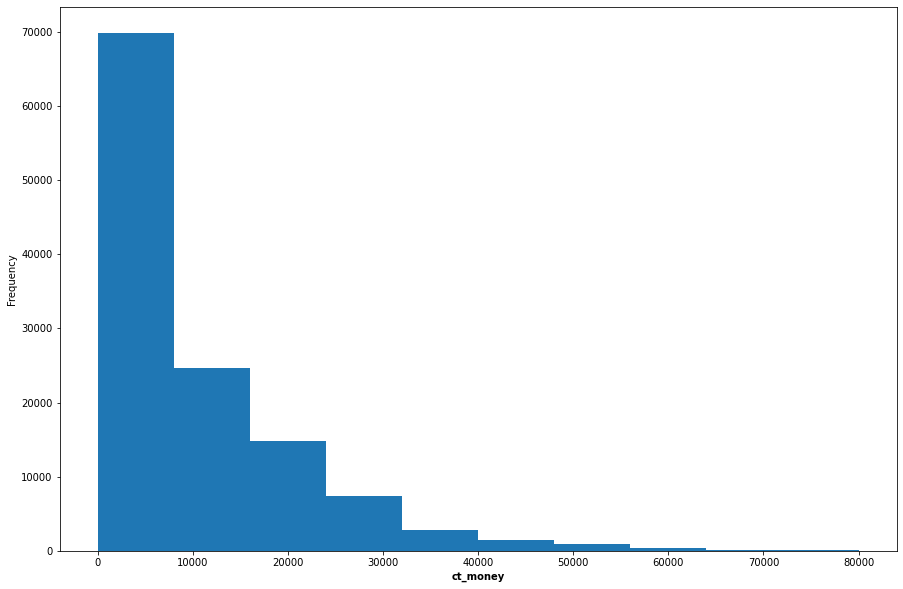

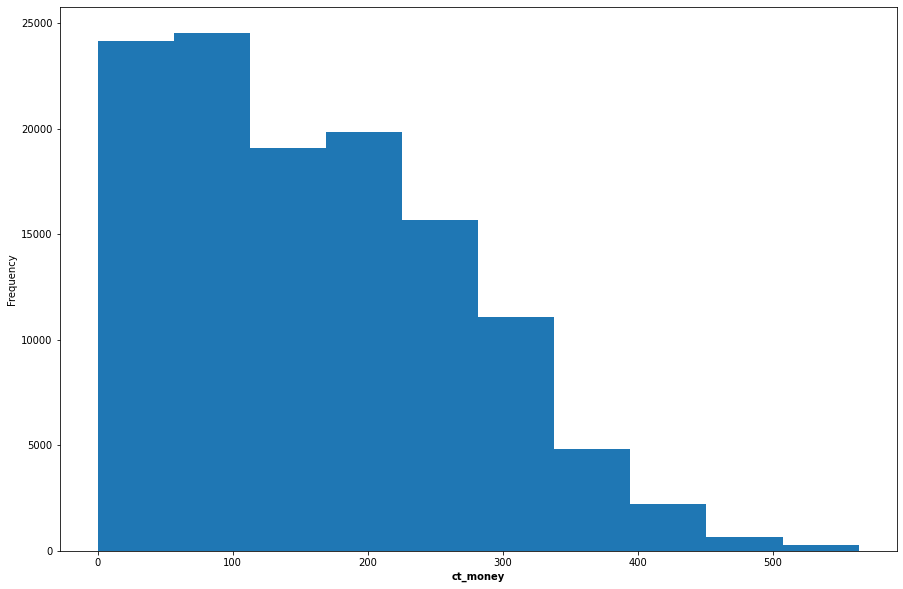

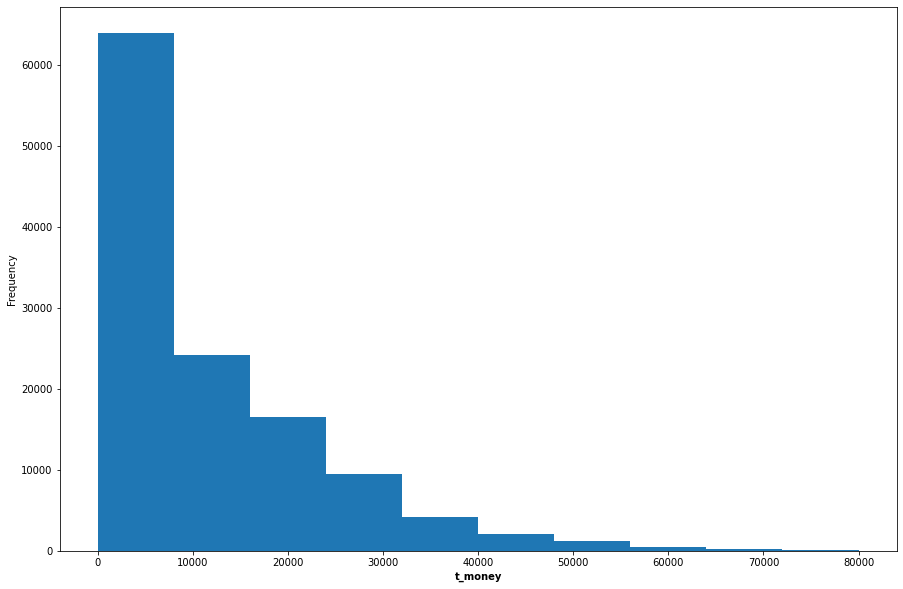

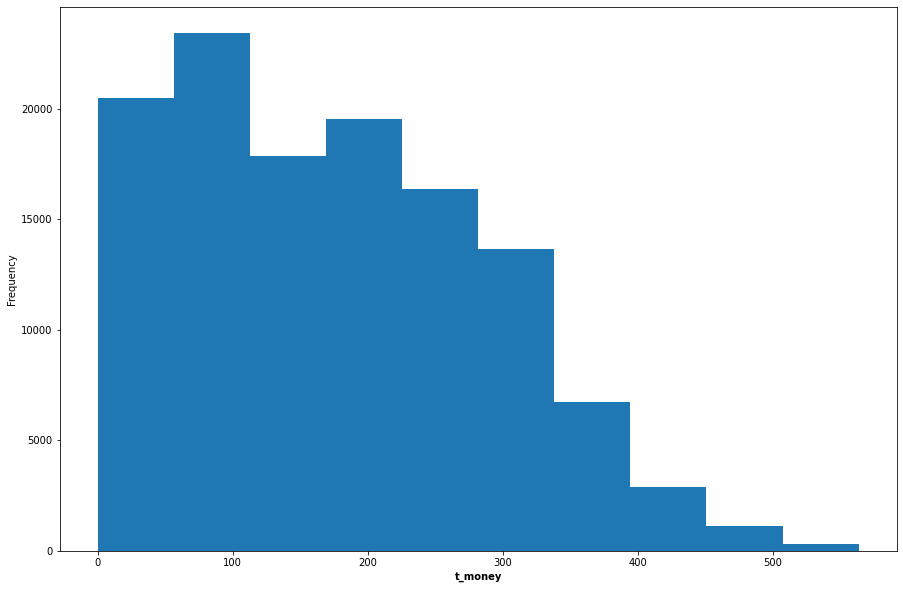

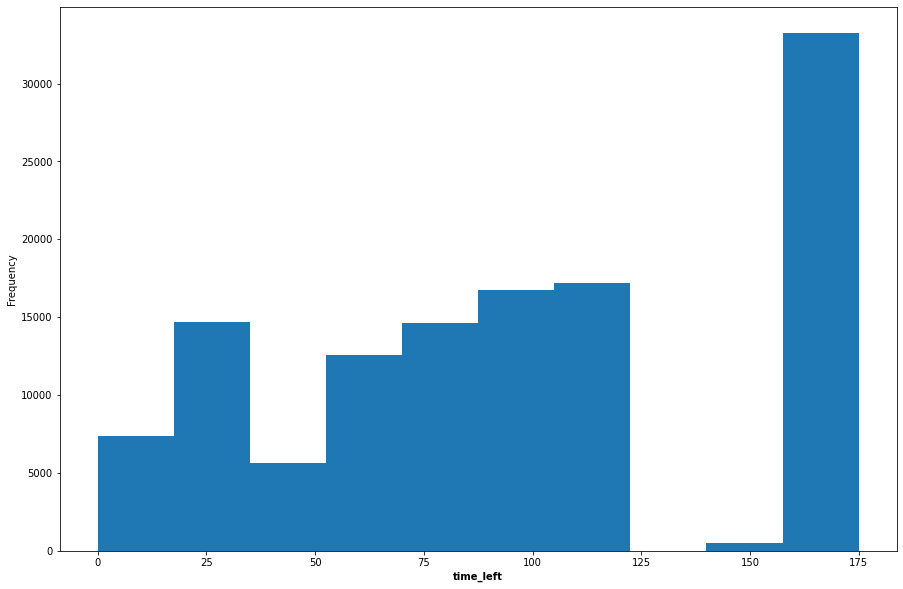

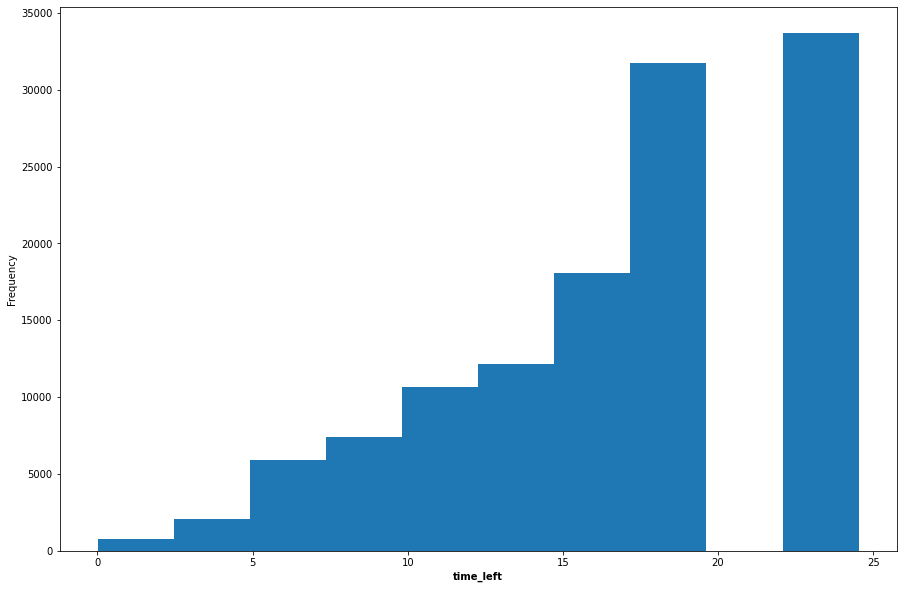

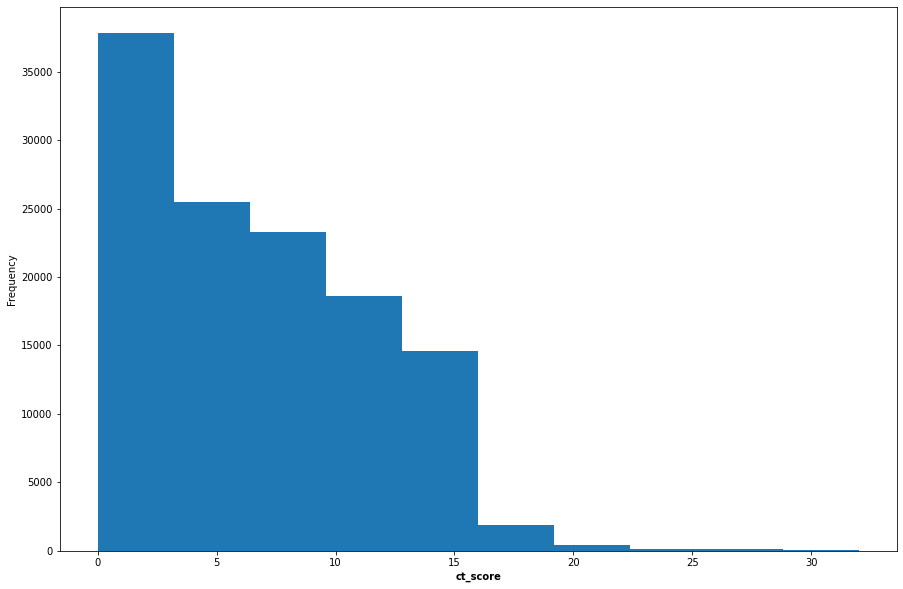

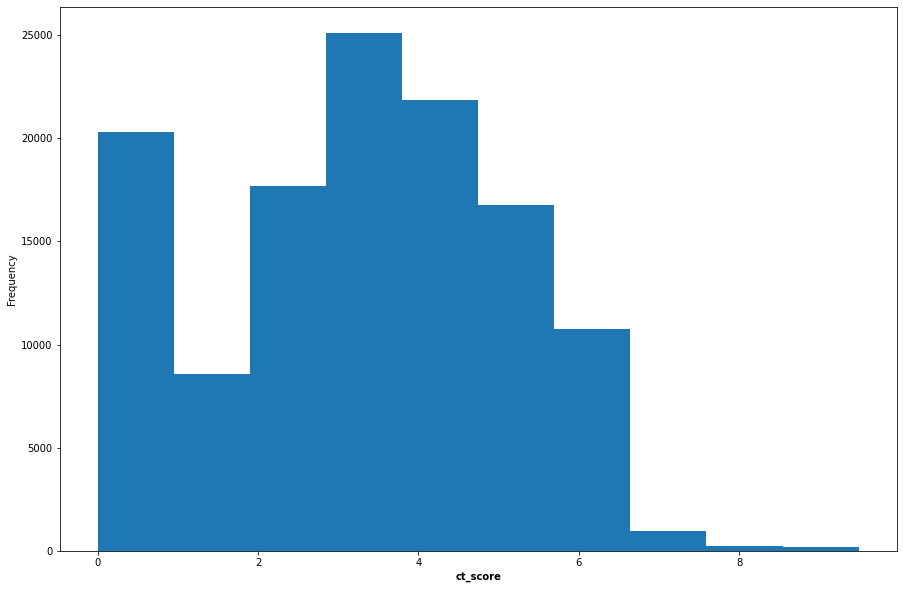

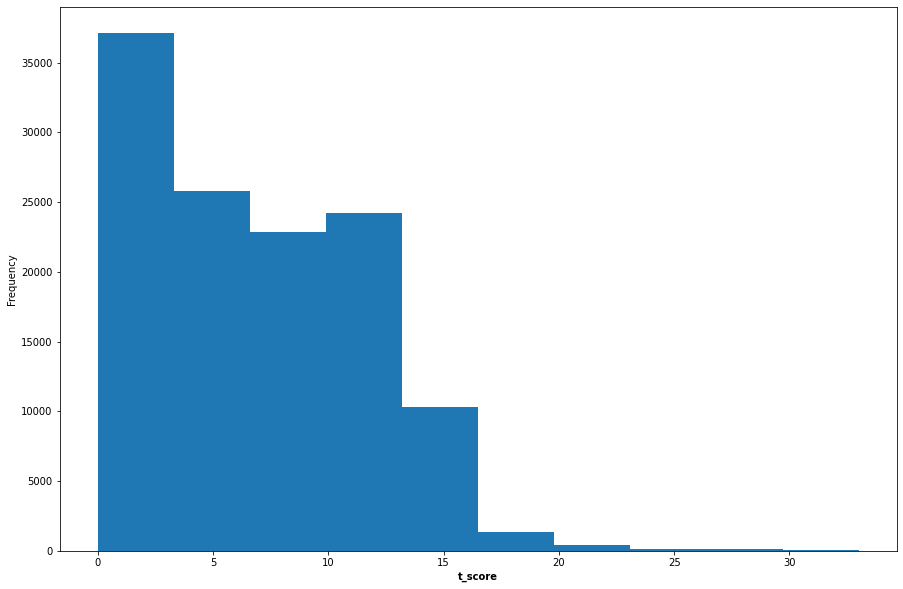

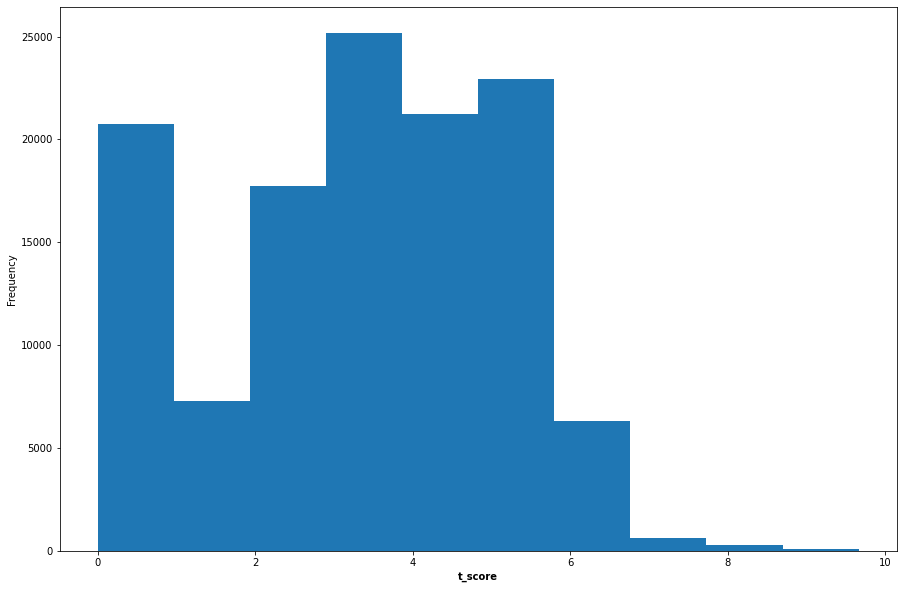

In [ ]:


#graficos de distribuicao para ct_money
d_norm['ct_money'].plot.hist()
plt.xlabel('ct_money', fontweight='bold')
plt.show()
d_norm['ct_money'] = scipy.stats.boxcox(d_norm['ct_money']+1,lmbda=0.5, alpha=None)
d_norm['ct_money'].plot.hist()
plt.xlabel('ct_money', fontweight='bold')
plt.show()

#graficos de distribuicao para t_money
d_norm['t_money'].plot.hist()
plt.xlabel('t_money', fontweight='bold')
plt.show()
d_norm['t_money'] = scipy.stats.boxcox(d_norm['t_money']+1,lmbda=0.5, alpha=None)
d_norm['t_money'].plot.hist()
plt.xlabel('t_money', fontweight='bold')
plt.show()

#graficos de distribuicao para time_left
d_norm['time_left'].plot.hist()
plt.xlabel('time_left', fontweight='bold')
plt.show()
d_norm['time_left'] = scipy.stats.boxcox(d_norm['time_left']+1,lmbda=0.5, alpha=None)
d_norm['time_left'].plot.hist()
plt.xlabel('time_left', fontweight='bold')
plt.show()


#graficos de distribuicao para ct_score
d_norm['ct_score'].plot.hist()
plt.xlabel('ct_score', fontweight='bold')
plt.show()
d_norm['ct_score'] = scipy.stats.boxcox(d_norm['ct_score']+1,lmbda=0.5, alpha=None)
d_norm['ct_score'].plot.hist()
plt.xlabel('ct_score', fontweight='bold')
plt.show()

#graficos de distribuicao para t_score
d_norm['t_score'].plot.hist()
plt.xlabel('t_score', fontweight='bold')
plt.show()
d_norm['t_score'] = scipy.stats.boxcox(d_norm['t_score']+1,lmbda=0.5, alpha=None)
d_norm['t_score'].plot.hist()
plt.xlabel('t_score', fontweight='bold')
plt.show()

In [ ]:
#Separação em x e y

d_normy = d_norm[['round_winner']]
d_normx = d_norm.drop(['round_winner'], axis=1)


In [ ]:
#Contando o tempo
import time
inicio = time.time()

In [ ]:
#Dividindo Train e Test e pegando o nome das classes

x_train, x_test, y_train, y_test = train_test_split(d_normx, d_normy, test_size=0.20, random_state=42)

class_names = []
for i in df :
  class_names.append(i)

x_train.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
46932,9.740528,5.483315,6.000000,1,1,338.0,80.0,384.0,85.0,272.597888,135.127678,4.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
10028,12.488616,6.000000,3.656854,7,0,300.0,212.0,300.0,342.0,32.698703,74.183988,2.0,4.0,1.0,3.0,4.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
54116,17.585709,6.485281,6.000000,3,0,381.0,495.0,400.0,497.0,349.573605,288.523665,4.0,5.0,4.0,4.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,4.0,4.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0
97546,18.069878,2.472136,2.898979,1,0,500.0,274.0,451.0,367.0,371.368451,22.576411,4.0,4.0,4.0,5.0,4.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,1.0,5.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0
2964,17.584688,4.928203,5.211103,6,0,500.0,500.0,486.0,500.0,310.416389,26.354894,5.0,5.0,5.0,5.0,5.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Criação e execução do modelo
model = Sequential()
model.add(Dense(200,activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(100,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

#Changing
y_train = to_categorical(y_train)
print(y_train)

#Exibição do modelo
print(model.summary())

#Compilação e execução
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x = x_train, y=y_train, epochs=20)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 200)               19400     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_27 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_28 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 52        
Total params: 45,877
Trainable params: 45,877
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3061/3061 [=============================

In [ ]:
#Score

percentages = model.predict(x_test)
print("Vetor de probabilidades\n",percentages)

predictions = []
for i in range(0,percentages.shape[0]):
  if percentages[i][0] > percentages[i][1]:
    predictions.append(0)
  else: 
    predictions.append(1)

hits=0
for i in range(0,y_test.shape[0]):
  if predictions[i] == int(y_test.iloc[i]):
    hits+=1

score = hits/y_test.shape[0]*100
print("\nScore:",score,"%")

Vetor de probabilidades
 [[4.7052526e-01 5.2947474e-01]
 [5.2409858e-01 4.7590142e-01]
 [7.0819152e-03 9.9291807e-01]
 ...
 [9.9993420e-01 6.5820255e-05]
 [2.3349132e-02 9.7665089e-01]
 [9.9249721e-01 7.5027794e-03]]

Score: 76.06813168858754 %


In [ ]:
#Tempo de criação e execução do modelo

fim = time.time()
ms_time = round((fim - inicio)*1000)
print("Tempo de criação e execução do modelo:",ms_time,"ms")

Tempo de criação e execução do modelo: 111827 ms


####Score 


######20 epochs: 75.872069275386 %


####Tempo

#####20 epochs: 165026 ms

#Membros do Grupo

**Nome:** Gustavo Henrique

**Matrícula:** 2018.1.08.014

**Nome:** Luiz Gustavo Akazawa Nora

**Matrícula:** 2018.1.08.025

**Nome:** Pedro Paulo Miranda Afonso

**Matrícula:** 2018.1.08.001 

**Nome:** Vitor Hugo da Costa Luz

**Matrícula:** 2018.1.08.023